<a href="https://colab.research.google.com/github/Abhicodes8/MidtermLoadForecasting/blob/main/Models_For_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving native_Load_2016.xlsx to native_Load_2016.xlsx
Saving native_Load_2017.xlsx to native_Load_2017.xlsx
Saving Native_Load_2018.xlsx to Native_Load_2018.xlsx
Saving Native_Load_2019.xlsx to Native_Load_2019.xlsx
Saving Native_Load_2020.xlsx to Native_Load_2020.xlsx
Saving Native_Load_2021.xlsx to Native_Load_2021.xlsx
Saving Native_Load_2022.xlsx to Native_Load_2022.xlsx
Saving Native_Load_2023.xlsx to Native_Load_2023.xlsx
Saving Native_Load_2024.xlsx to Native_Load_2024.xlsx
Saving Native_Load_2025.xlsx to Native_Load_2025.xlsx
Saving weatherdata.xlsx to weatherdata.xlsx

📂 File: native_Load_2016.xlsx
['Hour_End',
 'COAST',
 'EAST',
 'FAR_WEST',
 'NORTH',
 'NORTH_C',
 'SOUTHERN',
 'SOUTH_C',
 'WEST',
 'ERCOT']

📂 File: native_Load_2017.xlsx
['Hour Ending',
 'COAST',
 'EAST',
 'FWEST',
 'NORTH',
 'NCENT',
 'SOUTH',
 'SCENT',
 'WEST',
 'ERCOT']

📂 File: Native_Load_2018.xlsx
['HourEnding',
 'COAST',
 'EAST',
 'FWEST',
 'NORTH',
 'NCENT',
 'SOUTH',
 'SCENT',
 'WEST',
 'ERCOT']

📂 Fi

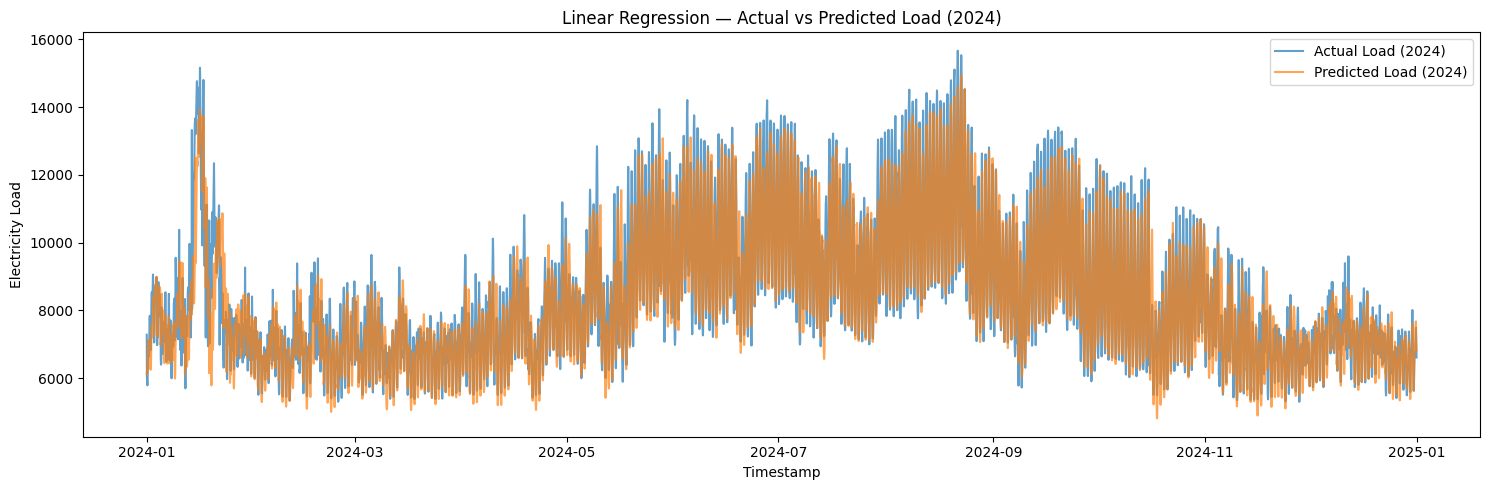

In [ ]:
from google.colab import files
uploaded = files.upload()
!pip install openpyxl xlrd
file_paths = [
    '/content/native_Load_2016.xlsx',
    '/content/native_Load_2017.xlsx',
    '/content/Native_Load_2018.xlsx',
    '/content/Native_Load_2019.xlsx',
    '/content/Native_Load_2020.xlsx',
    '/content/Native_Load_2021.xlsx',
    '/content/Native_Load_2022.xlsx',
    '/content/Native_Load_2023.xlsx',
    '/content/Native_Load_2024.xlsx',
    '/content/Native_Load_2025.xlsx'
]

weather_path = '/content/weatherdata.xlsx'
import os
from pprint import pprint
import pandas as pd

for path in file_paths:
    df = pd.read_excel(path, nrows=2)
    print(f"\n📂 File: {os.path.basename(path)}")
    pprint(df.columns.tolist())
older_paths = file_paths[:6]

for path in older_paths:
    try:
        df = pd.read_excel(path, nrows=2)
        print(f"\n📂 File: {os.path.basename(path)}")
        pprint(df.columns.tolist())
    except Exception as e:
        print(f" Error reading {os.path.basename(path)}: {e}")
def load_and_merge_load_data(file_paths):
    all_data = []

    for path in file_paths:
        df = pd.read_excel(path)
        df.columns = df.columns.str.strip()

        time_col = None
        for option in ['Hour Ending', 'HourEnding', 'Hour_End']:
            if option in df.columns:
                time_col = option
                break

        region_col = None
        for option in ['SCENT', 'SOUTH_C']:
            if option in df.columns:
                region_col = option
                break

        if time_col is None or region_col is None:
            print(f" Skipping file: {os.path.basename(path)} — missing column")
            continue

        df = df[[time_col, region_col]].copy()
        df.rename(columns={time_col: 'timestamp', region_col: 'load'}, inplace=True)
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        all_data.append(df)

    # Merge all files
    combined = pd.concat(all_data).sort_values('timestamp').reset_index(drop=True)
    return combined
import pandas as pd
import os

def load_and_merge_load_data(file_paths):
    all_data = []

    for path in file_paths:
        df = pd.read_excel(path)
        df.columns = df.columns.str.strip()  # Clean column names

        time_col = None
        for option in ['Hour Ending', 'HourEnding', 'Hour_End']:
            if option in df.columns:
                time_col = option
                break

        region_col = None
        for option in ['SCENT', 'SOUTH_C']:
            if option in df.columns:
                region_col = option
                break

        if time_col is None or region_col is None:
            print(f" Skipping file: {os.path.basename(path)} — missing required columns")
            continue

        df = df[[time_col, region_col]].copy()
        df.rename(columns={time_col: 'timestamp_raw', region_col: 'load'}, inplace=True)

        df['timestamp_raw'] = df['timestamp_raw'].astype(str).str.replace("24:00", "00:00", regex=False)
        df['timestamp'] = pd.to_datetime(df['timestamp_raw'], errors='coerce')
        df = df.dropna(subset=['timestamp'])  # Drop any rows that failed parsing

        all_data.append(df[['timestamp', 'load']])

    combined = pd.concat(all_data).sort_values('timestamp').reset_index(drop=True)
    return combined
file_paths = [
    '/content/native_Load_2016.xlsx',
    '/content/native_Load_2017.xlsx',
    '/content/Native_Load_2018.xlsx',
    '/content/Native_Load_2019.xlsx',
    '/content/Native_Load_2020.xlsx',
    '/content/Native_Load_2021.xlsx',
    '/content/Native_Load_2022.xlsx',
    '/content/Native_Load_2023.xlsx',
    '/content/Native_Load_2024.xlsx',
    '/content/Native_Load_2025.xlsx'
]

load_data = load_and_merge_load_data(file_paths)
# Load and clean weather data
weather_path = '/content/weatherdata.xlsx'
weather_raw = pd.read_excel(weather_path, sheet_name='data', header=None)

weather_raw = weather_raw.dropna(how='all')

for i in range(len(weather_raw)):
    if str(weather_raw.iloc[i, 0]).strip().lower() == 'date':
        header_row = i
        break

weather = pd.read_excel(weather_path, sheet_name='data', skiprows=header_row + 1)
weather.columns = ['date', 'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd']

# Parse dates and cast numerics
weather['date'] = pd.to_datetime(weather['date']).dt.date
weather[['tavg', 'tmax', 'tmin', 'prcp']] = weather[['tavg', 'tmax', 'tmin', 'prcp']].astype(float)

# Add derived features
weather['CDD'] = (weather['tavg'] - 65).clip(lower=0)
weather['HDD'] = (65 - weather['tavg']).clip(lower=0)
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = pd.DataFrame({'date': calendar.holidays(start='2004-01-01', end='2025-12-31')})
holidays['is_holiday'] = 1
holidays['date'] = holidays['date'].dt.date
# Create daily date for merging
load_data['date'] = load_data['timestamp'].dt.date
weather['date'] = pd.to_datetime(weather['date']).dt.date
holidays['date'] = pd.to_datetime(holidays['date']).dt.date

merged = load_data.merge(weather, on='date', how='left')
merged = merged.merge(holidays, on='date', how='left')
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)
merged = merged.drop(columns=['date'])

merged.head()
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month
merged['load_lag_24'] = merged['load'].shift(24)     # load 1 day ago
merged['load_lag_168'] = merged['load'].shift(168)   # load 1 week ago
merged['load_roll_mean_24'] = merged['load'].rolling(window=24).mean()
merged['load_roll_std_24'] = merged['load'].rolling(window=24).std()
merged.dropna(inplace=True)
# Lagged weather features — useful for capturing delayed effects of weather on load
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmin_lag_24'] = merged['tmin'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged['prcp_lag_24'] = merged['prcp'].shift(24)
merged['load_roll_mean_168'] = merged['load'].rolling(window=168).mean()
merged['load_roll_std_168'] = merged['load'].rolling(window=168).std()
merged['is_weekend'] = (merged['dayofweek'] >= 5).astype(int)
# Drop rows with missing values caused by lag/rolling ops
merged.dropna(inplace=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

feature_cols = [
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_holiday',
    'load_lag_24', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24',
    'load_roll_mean_168', 'load_roll_std_168',
    'tavg', 'tmin', 'tmax', 'prcp',
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'CDD', 'HDD'
]

train = merged[merged['timestamp'] < '2024-01-01']
test = merged[(merged['timestamp'] >= '2024-01-01') & (merged['timestamp'] < '2025-01-01')]

X_train = train[feature_cols]
y_train = train['load']

X_test = test[feature_cols]
y_test = test['load']

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")

plt.figure(figsize=(15,5))
plt.plot(test['timestamp'], y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test['timestamp'], y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('Linear Regression — Actual vs Predicted Load (2024)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()




/tmp/ipython-input-2-3235888757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = y_pred


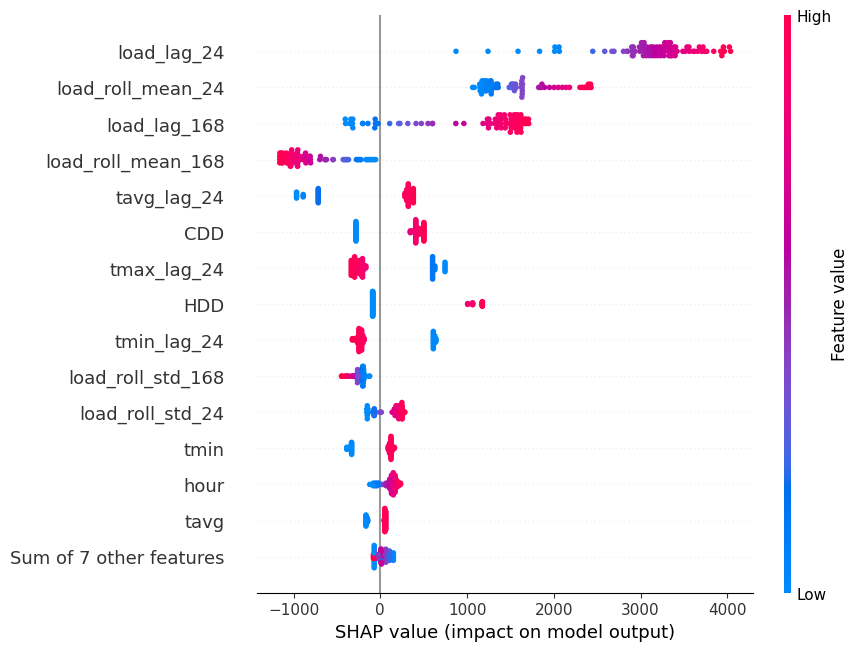

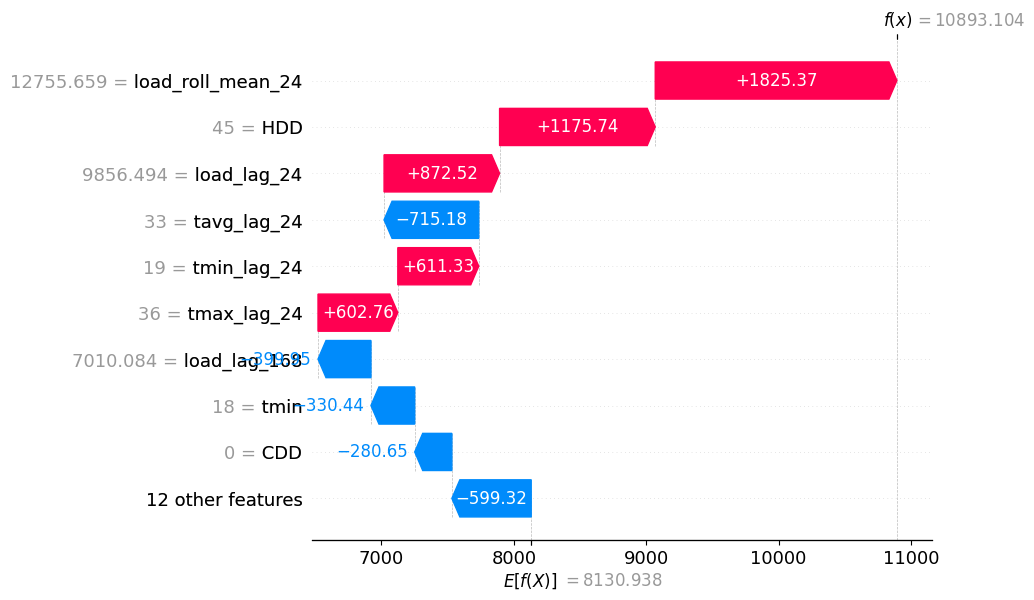

In [ ]:
import shap
import numpy as np

test['y_pred'] = y_pred
threshold = test['load'].quantile(0.99)
peak_test = test[test['load'] >= threshold].copy()

X_peak = peak_test[feature_cols]
y_peak = peak_test['load']

explainer_peak = shap.Explainer(model_lr.predict, X_test)
shap_values_peak = explainer_peak(X_peak)

shap.plots.beeswarm(shap_values_peak, max_display=15)

shap.plots.waterfall(shap_values_peak[0])


PermutationExplainer explainer: 8784it [03:36, 39.63it/s]


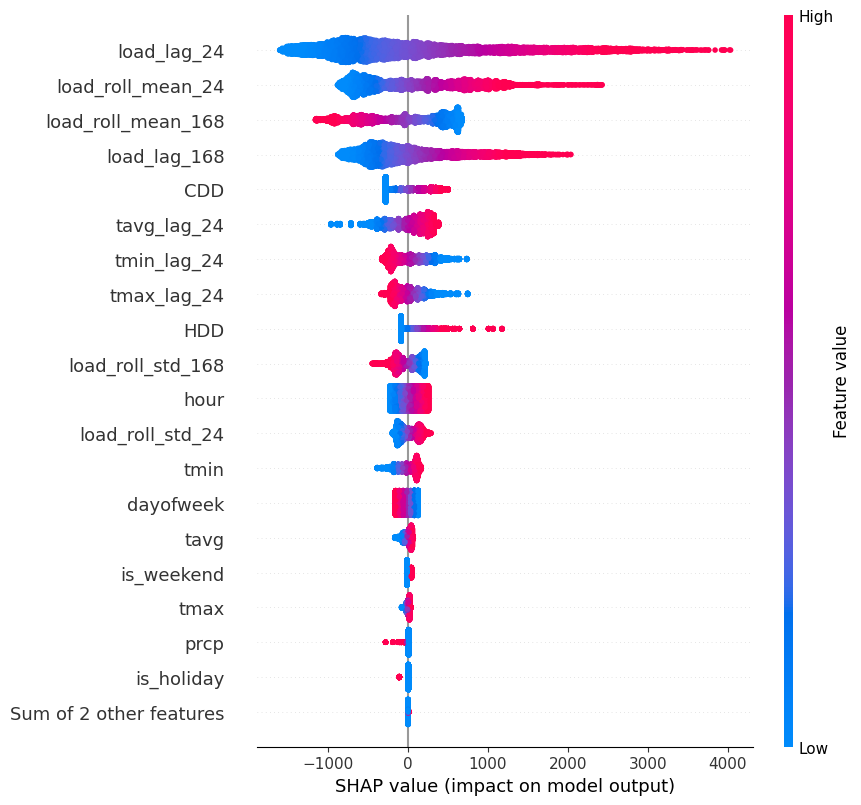

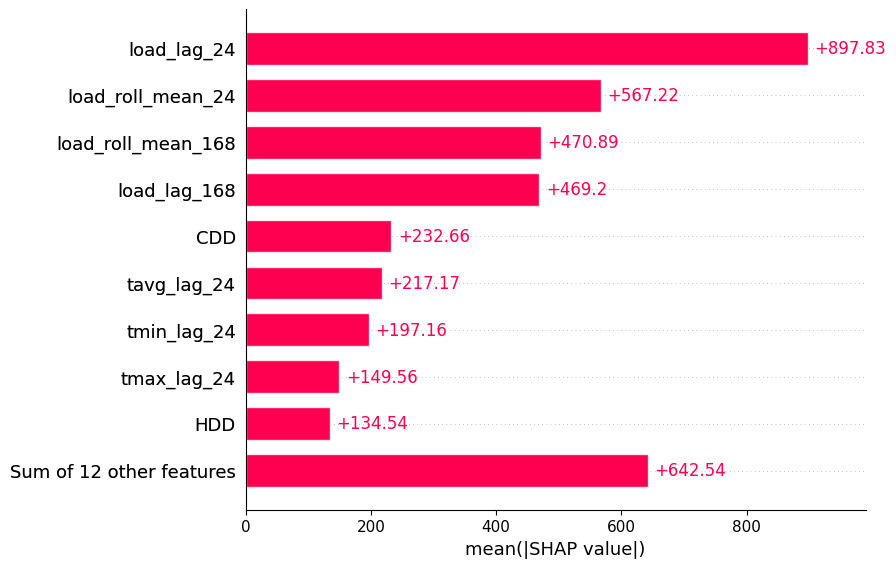

In [ ]:
explainer_full = shap.Explainer(model_lr.predict, X_test)
shap_values_full = explainer_full(X_test)

shap.plots.beeswarm(shap_values_full, max_display=20)

shap.plots.bar(shap_values_full)


✅ Model retrained with SHAP-driven features
🕒 Training and prediction time: 0.12 seconds
📈 MAE: 396.01
📉 RMSE: 558.46
🎯 MAPE: 4.74%


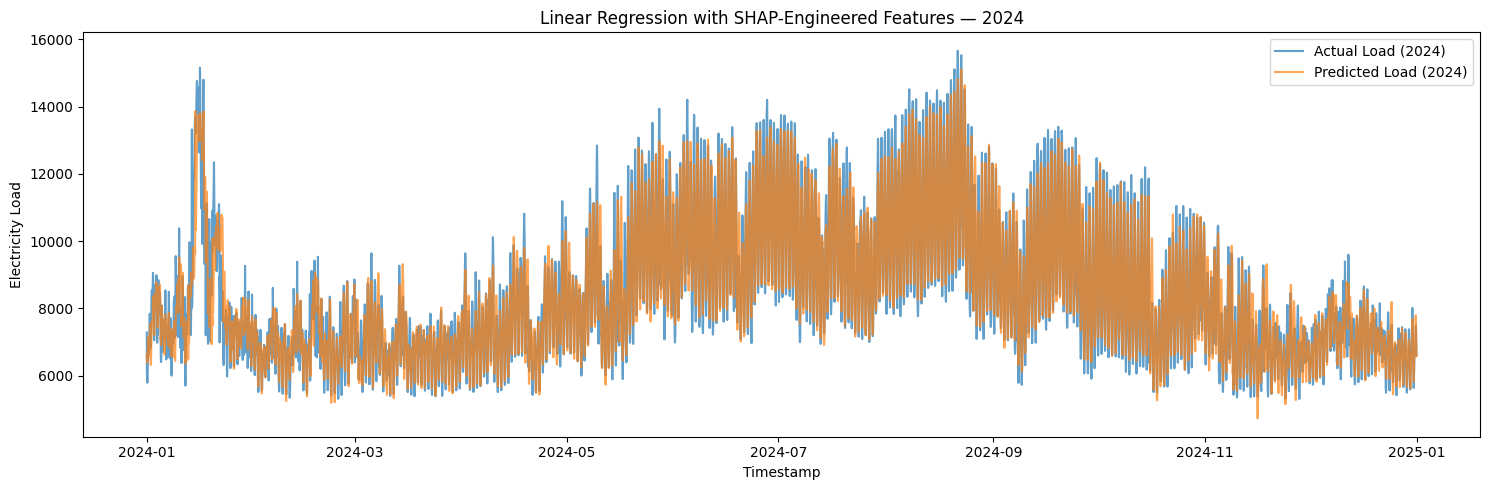

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

merged['temp_spike_vs_mean'] = merged['tmax'] - merged['tmin']

cold_threshold = merged["tmin"].quantile(0.05)
heat_threshold = merged["tmax"].quantile(0.95)
merged["is_extreme_cold_event"] = (merged["tmin"] < cold_threshold).astype(int)
merged["is_extreme_heat_event"] = (merged["tmax"] > heat_threshold).astype(int)

merged["CDD_lag_24"] = merged["CDD"].shift(24)
merged["HDD_lag_24"] = merged["HDD"].shift(24)

merged['hour_sin'] = np.sin(2 * np.pi * merged['hour'] / 24)
merged['hour_cos'] = np.cos(2 * np.pi * merged['hour'] / 24)
merged['dayofweek_sin'] = np.sin(2 * np.pi * merged['dayofweek'] / 7)
merged['dayofweek_cos'] = np.cos(2 * np.pi * merged['dayofweek'] / 7)

merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']
merged['is_holiday_x_hour'] = merged['is_holiday'] * merged['hour']

merged['is_monday'] = (merged['dayofweek'] == 0).astype(int)
merged['is_friday'] = (merged['dayofweek'] == 4).astype(int)

merged.dropna(inplace=True)

feature_cols = [
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_holiday',
    'load_lag_24', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24',
    'load_roll_mean_168', 'load_roll_std_168',
    'tavg', 'tmin', 'tmax', 'prcp',
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'CDD', 'HDD', 'CDD_lag_24', 'HDD_lag_24',
    'temp_spike_vs_mean', 'is_extreme_cold_event', 'is_extreme_heat_event',
    'hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos',
    'lag_24_x_hour', 'CDD_x_hour', 'is_holiday_x_hour',
    'is_monday', 'is_friday'
]

train = merged[merged['timestamp'] < '2024-01-01']
test = merged[(merged['timestamp'] >= '2024-01-01') & (merged['timestamp'] < '2025-01-01')]

X_train = train[feature_cols]
y_train = train['load']
X_test = test[feature_cols]
y_test = test['load']

start_time = time.time()

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

end_time = time.time()
elapsed_time = end_time - start_time

print(f" Model retrained with SHAP-driven features")
print(f" Training and prediction time: {elapsed_time:.2f} seconds")
print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")

plt.figure(figsize=(15,5))
plt.plot(test['timestamp'], y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test['timestamp'], y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('Linear Regression with SHAP-Engineered Features — 2024')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


PermutationExplainer explainer: 8784it [03:07, 44.73it/s]                          


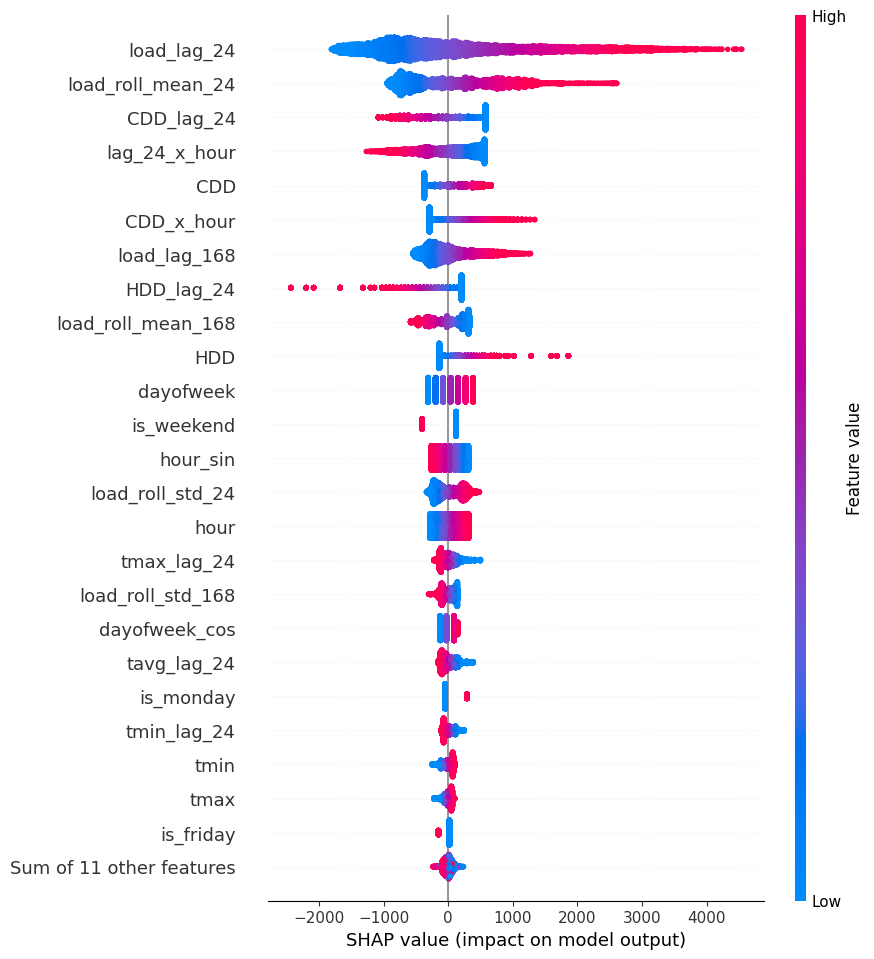

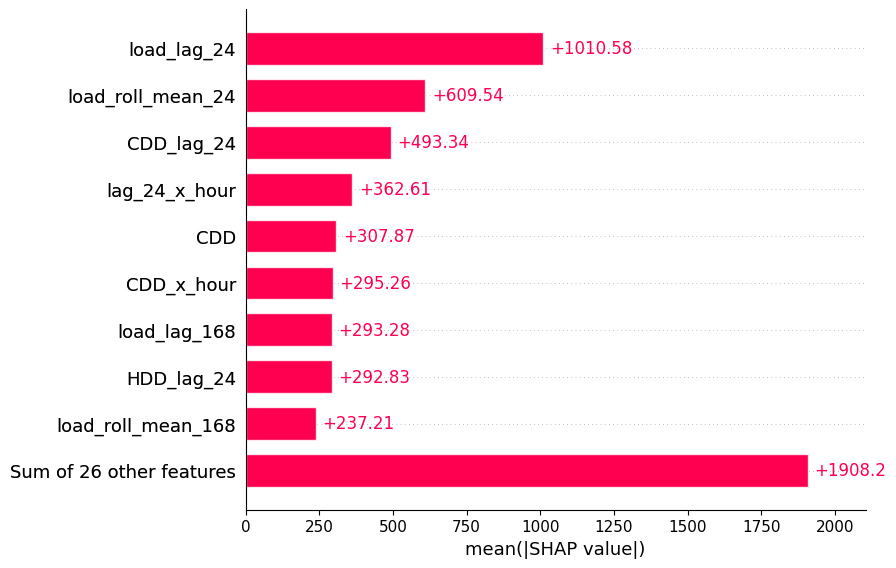

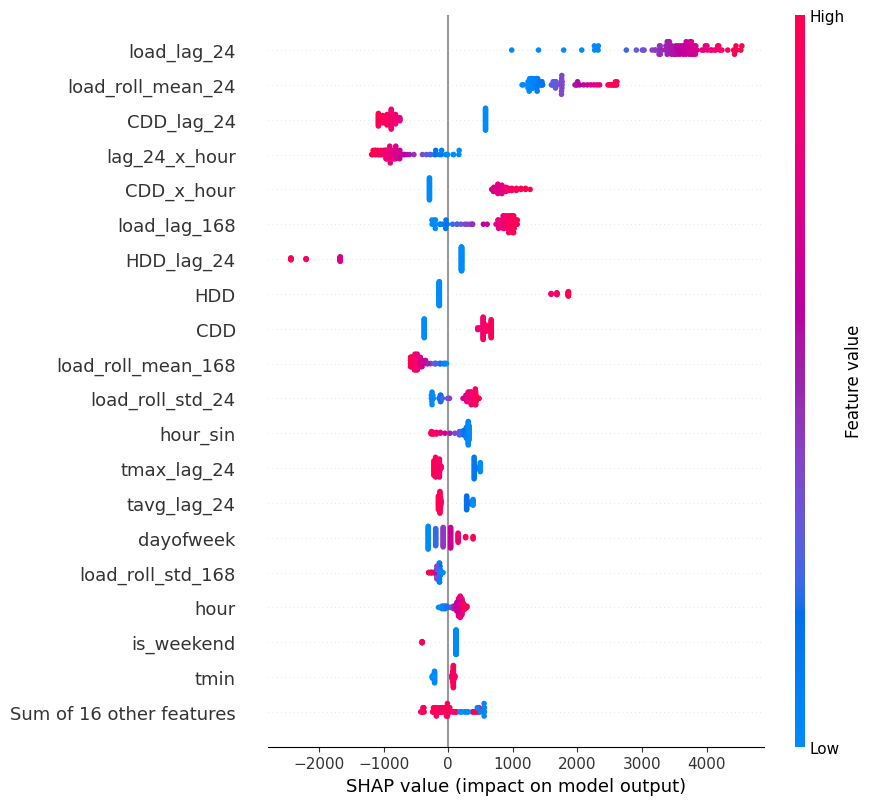

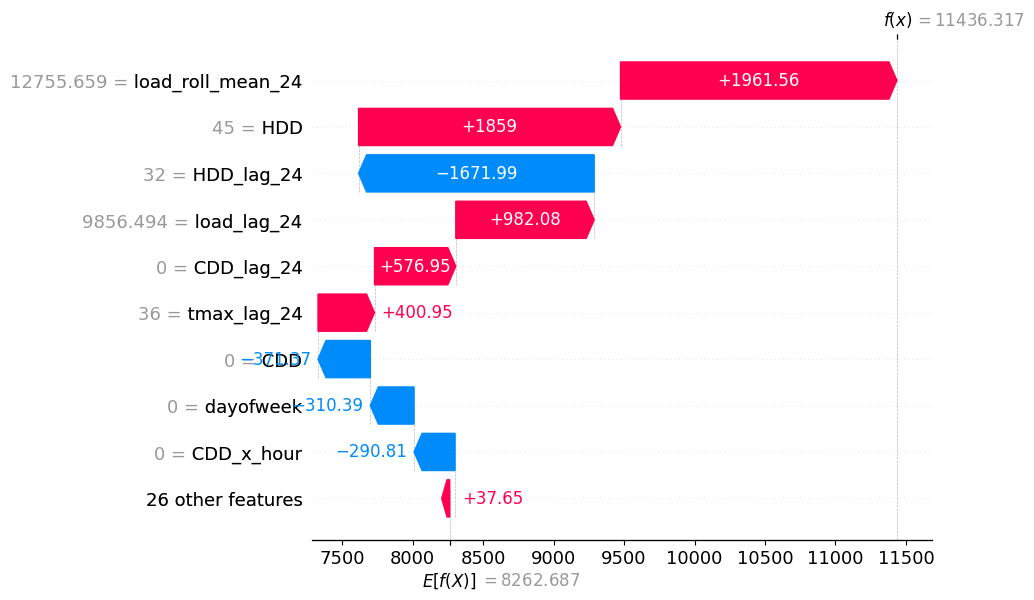

In [ ]:
import shap

# Recreate test predictions
y_pred = model_lr.predict(X_test)
test = test.copy()
test['y_pred'] = y_pred

# Recompute SHAP on updated test set
explainer_full = shap.Explainer(model_lr.predict, X_test)
shap_values_full = explainer_full(X_test)

# === Summary Beeswarm ===
shap.plots.beeswarm(shap_values_full, max_display=25)

# === Bar Plot: Mean SHAP by Feature ===
shap.plots.bar(shap_values_full)
# Identify top 1% peak demand points
threshold = test['load'].quantile(0.99)
peak_test = test[test['load'] >= threshold].copy()
X_peak = peak_test[feature_cols]

# Run SHAP on peak subset
explainer_peak = shap.Explainer(model_lr.predict, X_test)
shap_values_peak = explainer_peak(X_peak)

# === Peak Beeswarm ===
shap.plots.beeswarm(shap_values_peak, max_display=20)

# === Optional: Example Waterfall ===
shap.plots.waterfall(shap_values_peak[0])


/tmp/ipython-input-2-1092237425.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')


✅ XGBoost trained on baseline features
🕒 Compute Time: 18.45 seconds
📈 MAE: 273.51
📉 RMSE: 421.94
🎯 MAPE: 3.15%


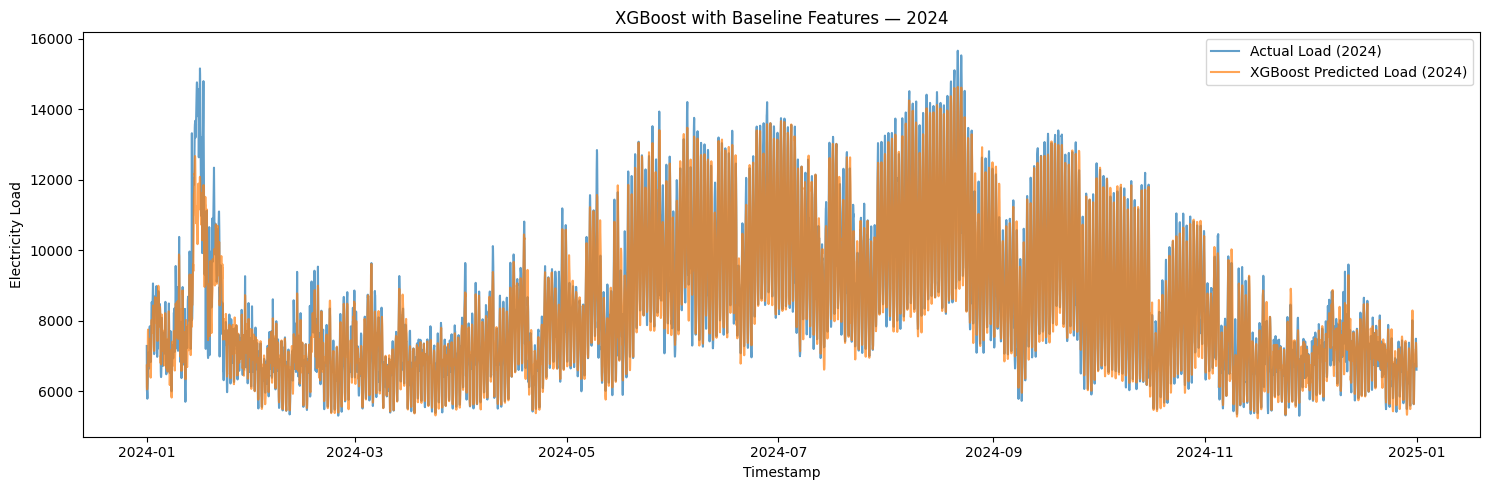

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# === Baseline Feature Set (no SHAP-driven features) ===
baseline_features = [
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_holiday',
    'load_lag_24', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24',
    'load_roll_mean_168', 'load_roll_std_168',
    'tavg', 'tmin', 'tmax', 'prcp',
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'CDD', 'HDD'
]
# === Reconstruct Timestamp Index ===
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
merged = merged.set_index('timestamp')


X_train = train[baseline_features]
y_train = train['load']
X_test = test[baseline_features]
y_test = test['load']

# === Train XGBoost Regressor ===
start_time = time.time()

model_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

model_xgb.fit(X_train, y_train)

# === Predict & Evaluate ===
y_pred = model_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
end_time = time.time()

print(f" XGBoost trained on baseline features")
print(f" Compute Time: {end_time - start_time:.2f} seconds")
print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")

# === Plot Actual vs Predicted ===
plt.figure(figsize=(15,5))
plt.plot(test['timestamp'], y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test['timestamp'], y_pred, label='XGBoost Predicted Load (2024)', alpha=0.7)
plt.title('XGBoost with Baseline Features — 2024')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-8-2406437842.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
100%|===================| 8756/8784 [05:06<00:00]       

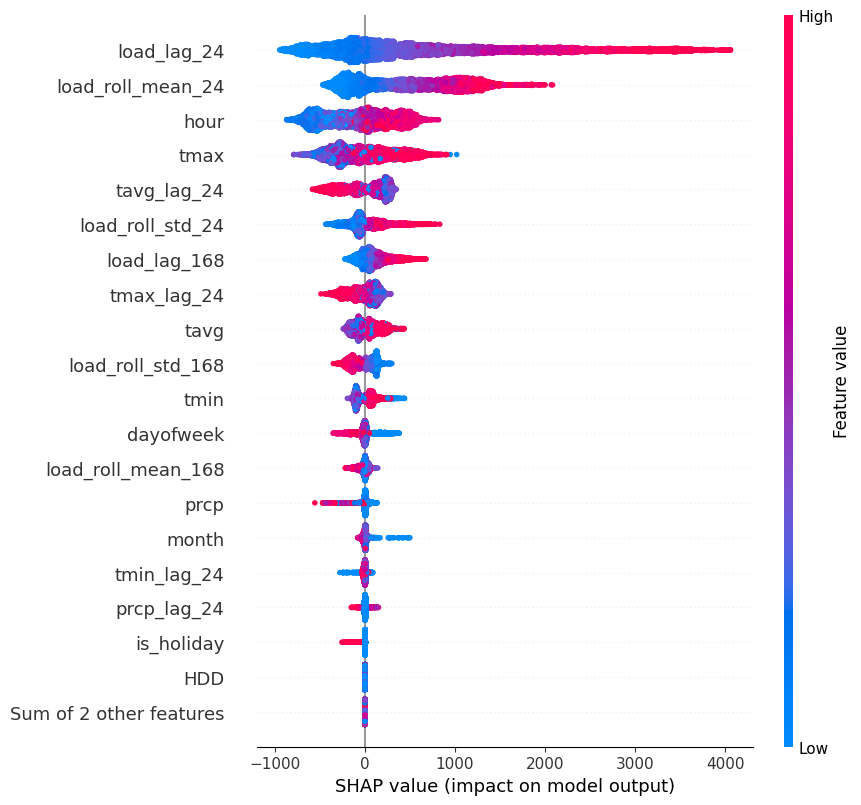

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Step 1: Recreate timestamp and set index ===
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged = merged.copy()
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
merged = merged.set_index('timestamp')

# === Step 2: Baseline feature set ===
feature_cols = [
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_holiday',
    'load_lag_24', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24',
    'load_roll_mean_168', 'load_roll_std_168',
    'tavg', 'tmin', 'tmax', 'prcp',
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'CDD', 'HDD'
]

# === Step 3: Split for 2024 evaluation ===
train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = test_df[feature_cols]
y_test = test_df['load']

# === Step 4: Train XGBoost ===
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# === Step 5: SHAP analysis ===
background = X_train.sample(100, random_state=42)
explainer = shap.Explainer(model, background)
shap_values = explainer(X_test, check_additivity=False)

# === Step 6: Plot SHAP summary ===
shap.plots.beeswarm(shap_values, max_display=20)


 28%|======              | 2453/8784 [01:24<03:36]       

Saving native_Load_2016.xlsx to native_Load_2016 (1).xlsx
Saving weatherdata.xlsx to weatherdata (1).xlsx
Saving Native_Load_2025.xlsx to Native_Load_2025 (1).xlsx
Saving Native_Load_2024.xlsx to Native_Load_2024 (1).xlsx
Saving Native_Load_2023.xlsx to Native_Load_2023 (1).xlsx
Saving Native_Load_2022.xlsx to Native_Load_2022 (1).xlsx
Saving Native_Load_2021.xlsx to Native_Load_2021 (1).xlsx
Saving Native_Load_2020.xlsx to Native_Load_2020 (1).xlsx
Saving Native_Load_2019.xlsx to Native_Load_2019 (1).xlsx
Saving Native_Load_2018.xlsx to Native_Load_2018 (1).xlsx
Saving native_Load_2017.xlsx to native_Load_2017 (1).xlsx


/tmp/ipython-input-3-1133746326.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')


📈 MAE: 79.53
📉 RMSE: 192.39
🎯 MAPE (2024): 0.85%


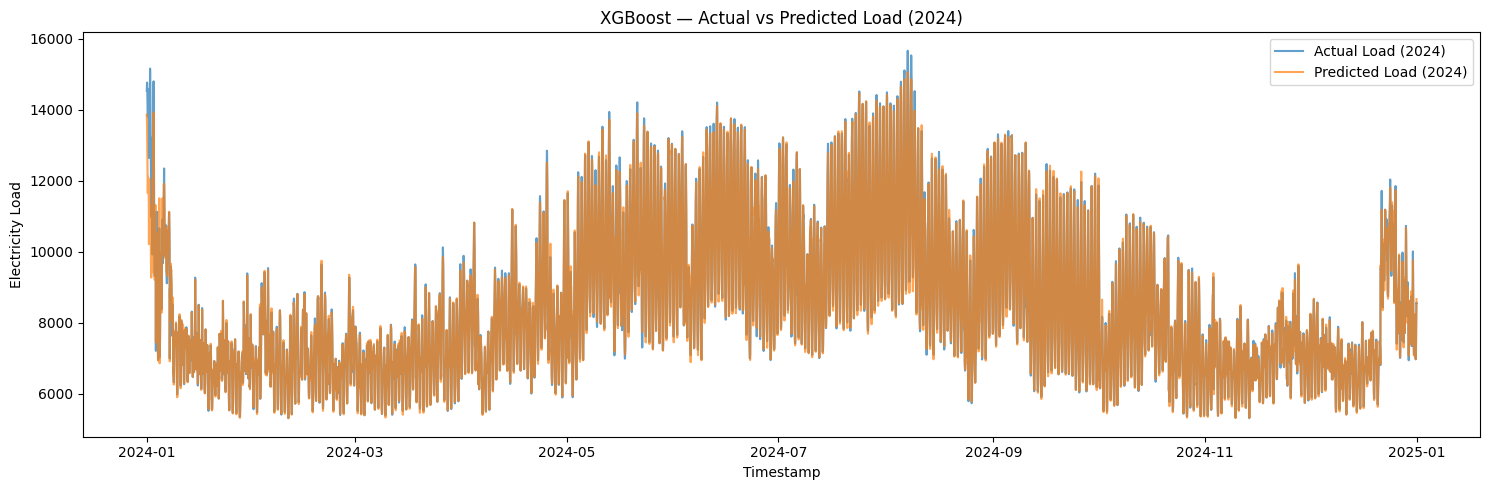

In [ ]:
# === Imports ===
!pip install openpyxl xlrd --quiet
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.tseries.holiday import USFederalHolidayCalendar

# === File Upload ===
uploaded = files.upload()

# === File Paths ===
file_paths = [
    '/content/native_Load_2016.xlsx',
    '/content/native_Load_2017.xlsx',
    '/content/Native_Load_2018.xlsx',
    '/content/Native_Load_2019.xlsx',
    '/content/Native_Load_2020.xlsx',
    '/content/Native_Load_2021.xlsx',
    '/content/Native_Load_2022.xlsx',
    '/content/Native_Load_2023.xlsx',
    '/content/Native_Load_2024.xlsx',
    '/content/Native_Load_2025.xlsx'
]
weather_path = '/content/weatherdata.xlsx'

# === Load Load Data ===
def load_and_merge_load_data(file_paths):
    all_data = []
    for path in file_paths:
        df = pd.read_excel(path)
        df.columns = df.columns.str.strip()
        time_col = next((c for c in ['Hour Ending', 'HourEnding', 'Hour_End'] if c in df.columns), None)
        region_col = next((c for c in ['SCENT', 'SOUTH_C'] if c in df.columns), None)
        if time_col and region_col:
            df = df[[time_col, region_col]].copy()
            df.rename(columns={time_col: 'timestamp_raw', region_col: 'load'}, inplace=True)
            df['timestamp_raw'] = df['timestamp_raw'].astype(str).str.replace("24:00", "00:00")
            df['timestamp'] = pd.to_datetime(df['timestamp_raw'], errors='coerce')
            df = df.dropna(subset=['timestamp'])
            all_data.append(df[['timestamp', 'load']])
    return pd.concat(all_data).sort_values('timestamp').reset_index(drop=True)

load_data = load_and_merge_load_data(file_paths)

# === Load Weather ===
weather_raw = pd.read_excel(weather_path, sheet_name='data', header=None)
weather_raw = weather_raw.dropna(how='all')
for i in range(len(weather_raw)):
    if str(weather_raw.iloc[i, 0]).strip().lower() == 'date':
        header_row = i
        break
weather = pd.read_excel(weather_path, sheet_name='data', skiprows=header_row + 1)
weather.columns = ['date', 'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd']
weather['date'] = pd.to_datetime(weather['date']).dt.date
weather[['tavg', 'tmax', 'tmin', 'prcp']] = weather[['tavg', 'tmax', 'tmin', 'prcp']].astype(float)
weather['CDD'] = (weather['tavg'] - 65).clip(lower=0)
weather['HDD'] = (65 - weather['tavg']).clip(lower=0)

# === Load Holiday ===
calendar = USFederalHolidayCalendar()
holidays = pd.DataFrame({'date': calendar.holidays(start='2004-01-01', end='2025-12-31')})
holidays['is_holiday'] = 1
holidays['date'] = pd.to_datetime(holidays['date']).dt.date

# === Merge All ===
load_data['date'] = load_data['timestamp'].dt.date
merged = load_data.merge(weather, on='date', how='left').merge(holidays, on='date', how='left')
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)
merged = merged.drop(columns=['date'])

# === Feature Engineering ===
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_168'] = merged['load'].shift(168)
merged['load_roll_mean_24'] = merged['load'].rolling(window=24).mean()
merged['load_roll_std_24'] = merged['load'].rolling(window=24).std()
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmin_lag_24'] = merged['tmin'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged['prcp_lag_24'] = merged['prcp'].shift(24)
merged['load_roll_mean_168'] = merged['load'].rolling(window=168).mean()
merged['load_roll_std_168'] = merged['load'].rolling(window=168).std()
merged['is_weekend'] = merged['dayofweek'].isin([5,6]).astype(int)
merged['is_monday'] = (merged['dayofweek'] == 0).astype(int)
merged['is_friday'] = (merged['dayofweek'] == 4).astype(int)
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']
merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['load_spike_vs_mean'] = (merged['load'] - merged['load_roll_mean_24']) / (merged['load_roll_mean_24'] + 1)
merged['temp_spike_vs_mean'] = (merged['tmax'] - merged['tavg']) / (merged['tavg'] + 1)
merged['tmin_roll_min_72'] = merged['tmin'].shift(1).rolling(72).min()
merged.dropna(inplace=True)

# === Reconstruct Timestamp Index ===
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
merged = merged.set_index('timestamp')

# === Model Training (XGBoost) ===
feature_cols = [
    'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'load_lag_24', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24', 'tavg_lag_24', 'tmin_lag_24',
    'tmax_lag_24', 'prcp_lag_24', 'load_roll_mean_168', 'load_roll_std_168',
    'is_weekend', 'temp_spike_vs_mean', 'load_spike_vs_mean',
    'lag_24_x_hour', 'CDD_x_hour', 'is_monday', 'is_friday',
    'tmin_roll_min_72'
]

train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = test_df[feature_cols]
y_test = test_df['load']

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE (2024): {mape:.2f}%")

# === Plot ===
plt.figure(figsize=(15,5))
plt.plot(test_df.index, y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test_df.index, y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('XGBoost — Actual vs Predicted Load (2024)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


100%|===================| 8753/8784 [03:58<00:00]       

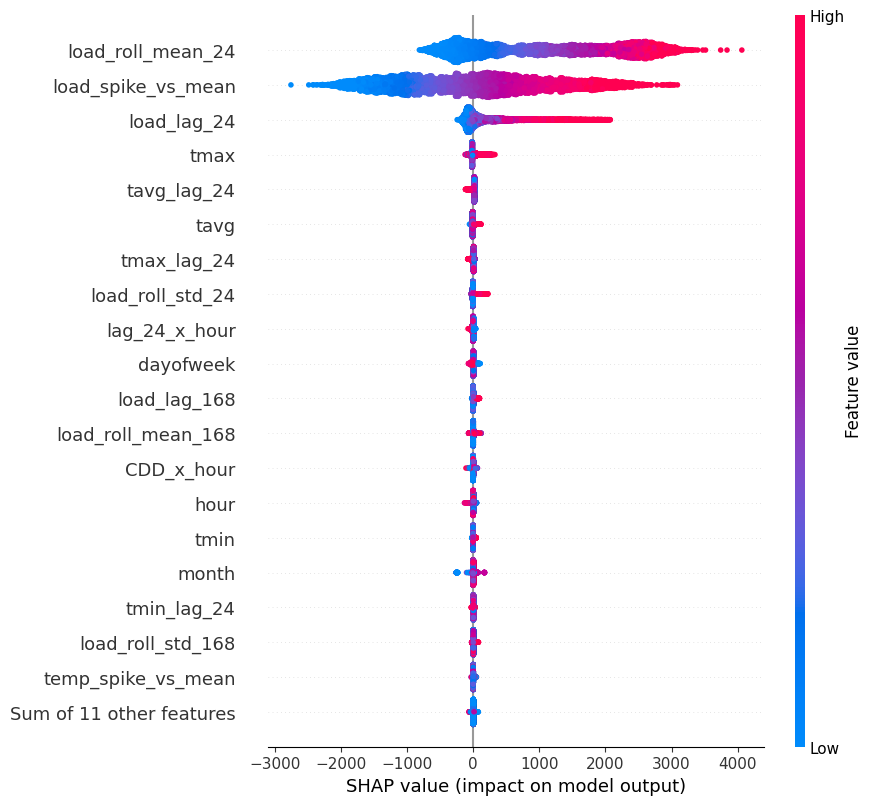

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# === Step 5: SHAP analysis ===
background = X_train.sample(100, random_state=42)
explainer = shap.Explainer(model, background)
shap_values = explainer(X_test, check_additivity=False)

# === Step 6: Plot SHAP summary ===
shap.plots.beeswarm(shap_values, max_display=20)


/tmp/ipython-input-4-1589147417.py:67: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')


📈 MAE: 73.74
📉 RMSE: 135.06
🎯 MAPE (2024): 0.83%


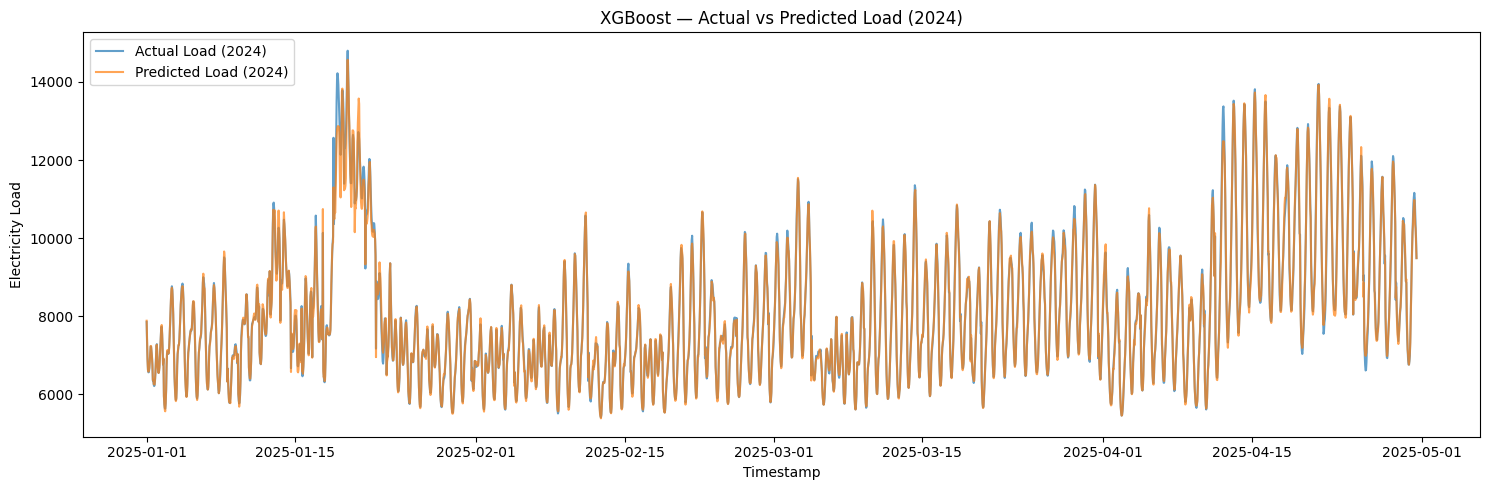

In [ ]:
!pip install --upgrade xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# === Merge All ===
load_data['date'] = load_data['timestamp'].dt.date
merged = load_data.merge(weather, on='date', how='left').merge(holidays, on='date', how='left')
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)
merged = merged.drop(columns=['date'])


# === Feature Engineering ===
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

# Lag features
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_48'] = merged['load'].shift(48)
merged['load_lag_168'] = merged['load'].shift(168)

# Rolling load statistics
merged['load_roll_mean_24'] = merged['load'].shift(1).rolling(24).mean()
merged['load_roll_std_24'] = merged['load'].shift(1).rolling(24).std()
merged['load_roll_mean_168'] = merged['load'].shift(1).rolling(168).mean()
merged['load_roll_std_168'] = merged['load'].shift(1).rolling(168).std()
merged['load_roll_mean_336'] = merged['load'].shift(1).rolling(336).mean()
merged['load_roll_max_24'] = merged['load'].shift(1).rolling(24).max()

# Weather lag features
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmin_lag_24'] = merged['tmin'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged['prcp_lag_24'] = merged['prcp'].shift(24)

# Weather rolling stats
merged['tmax_roll_max_72'] = merged['tmax'].shift(1).rolling(72).max()
merged['tmin_roll_min_72'] = merged['tmin'].shift(1).rolling(72).min()

# Custom indicators
merged['is_weekend'] = merged['dayofweek'].isin([5,6]).astype(int)
merged['is_monday'] = (merged['dayofweek'] == 0).astype(int)
merged['is_friday'] = (merged['dayofweek'] == 4).astype(int)

# Interaction features
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']
merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['load_spike_vs_mean'] = (merged['load'] - merged['load_roll_mean_24']) / (merged['load_roll_mean_24'] + 1)
merged['temp_spike_vs_mean'] = (merged['tmax'] - merged['tavg']) / (merged['tavg'] + 1)

# Extreme event indicator
heat_threshold = merged["tmax"].quantile(0.95)
merged["is_extreme_heat_event"] = (merged["tmax"] > heat_threshold).astype(int)

# Drop any NaN rows caused by shifting/rolling
merged.dropna(inplace=True)


# === Reconstruct Timestamp Index ===
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
merged = merged.set_index('timestamp')

# === Model Training (XGBoost) ===
feature_cols = [
    'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_monday', 'is_friday',

    # Lag features
    'load_lag_24', 'load_lag_48', 'load_lag_168',

    # Rolling load stats
    'load_roll_mean_24', 'load_roll_std_24', 'load_roll_mean_168',
    'load_roll_std_168', 'load_roll_mean_336', 'load_roll_max_24',

    # Weather lag/rolling
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'tmax_roll_max_72', 'tmin_roll_min_72',

    # Custom interaction features
    'CDD_x_hour', 'lag_24_x_hour', 'load_spike_vs_mean', 'temp_spike_vs_mean',

    # Extreme event feature
    'is_extreme_heat_event'
]



train_df = merged.loc[:'2024-12-31']
test_df = merged.loc['2025-01-01':'2025-6-1']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = test_df[feature_cols]
y_test = test_df['load']

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE (2024): {mape:.2f}%")

# === Plot ===
plt.figure(figsize=(15,5))
plt.plot(test_df.index, y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test_df.index, y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('XGBoost — Actual vs Predicted Load (2024)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-3933304438.py:65: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')


📈 MAE: 70.73
📉 RMSE: 107.32
🎯 MAPE (2024): 0.80%


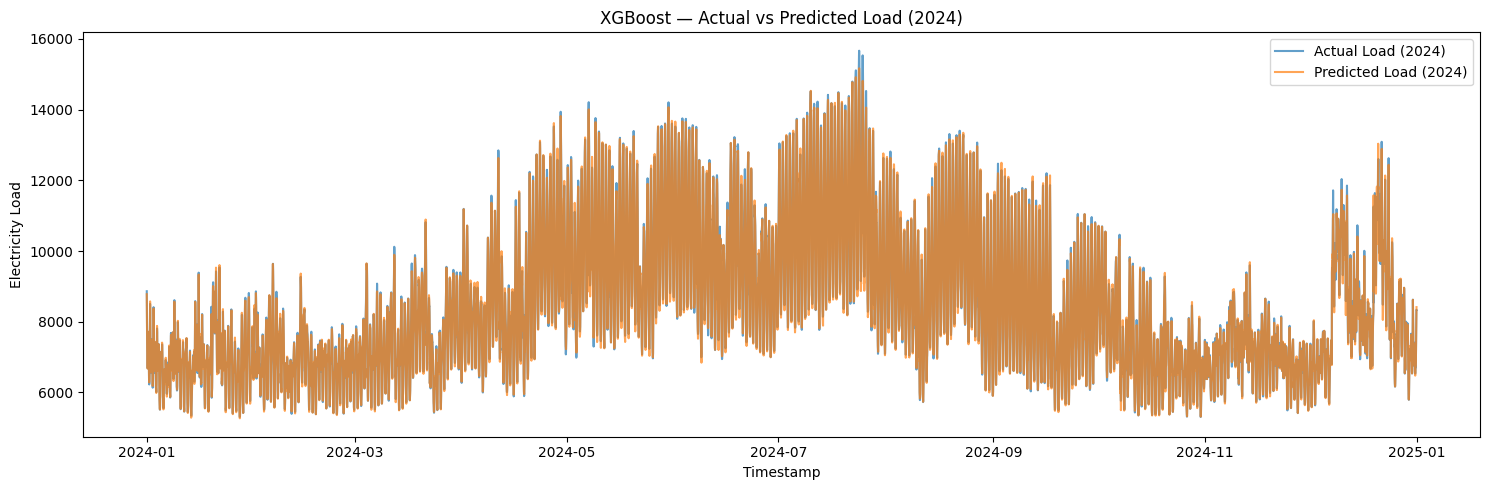

In [ ]:
# Install XGBoost if needed
!pip install --upgrade xgboost

# === Imports ===
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Merge All Sources ===
load_data['date'] = load_data['timestamp'].dt.date
merged = load_data.merge(weather, on='date', how='left').merge(holidays, on='date', how='left')
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)
merged = merged.drop(columns=['date'])

# === Feature Engineering ===
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

# Lag features
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_48'] = merged['load'].shift(48)
merged['load_lag_168'] = merged['load'].shift(168)

# Rolling load statistics
merged['load_roll_mean_24'] = merged['load'].shift(1).rolling(24).mean()
merged['load_roll_std_24'] = merged['load'].shift(1).rolling(24).std()
merged['load_roll_mean_168'] = merged['load'].shift(1).rolling(168).mean()
merged['load_roll_std_168'] = merged['load'].shift(1).rolling(168).std()
merged['load_roll_mean_336'] = merged['load'].shift(1).rolling(336).mean()
merged['load_roll_max_24'] = merged['load'].shift(1).rolling(24).max()

# Weather lag features
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmin_lag_24'] = merged['tmin'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged['prcp_lag_24'] = merged['prcp'].shift(24)

# Weather rolling stats
merged['tmax_roll_max_72'] = merged['tmax'].shift(1).rolling(72).max()
merged['tmin_roll_min_72'] = merged['tmin'].shift(1).rolling(72).min()

# Custom indicators
merged['is_weekend'] = merged['dayofweek'].isin([5,6]).astype(int)
merged['is_monday'] = (merged['dayofweek'] == 0).astype(int)
merged['is_friday'] = (merged['dayofweek'] == 4).astype(int)

# Interaction features
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']
merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['load_spike_vs_mean'] = (merged['load'] - merged['load_roll_mean_24']) / (merged['load_roll_mean_24'] + 1)
merged['temp_spike_vs_mean'] = (merged['tmax'] - merged['tavg']) / (merged['tavg'] + 1)

# Extreme event indicator
heat_threshold = merged["tmax"].quantile(0.95)
merged["is_extreme_heat_event"] = (merged["tmax"] > heat_threshold).astype(int)

# Drop any NaN rows caused by shifting/rolling
merged.dropna(inplace=True)

# Reconstruct timestamp index
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
merged = merged.set_index('timestamp')

# === Cleaned Feature Set (High-VIF Features Removed) ===
feature_cols = [
    'tmin', 'prcp', 'snow', 'snwd', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_monday', 'is_friday',

    # Lag features
    'load_lag_24', 'load_lag_48', 'load_lag_168',

    # Rolling load stats
    'load_roll_std_24', 'load_roll_std_168', 'load_roll_mean_336',

    # Weather lag/rolling
    'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'tmax_roll_max_72', 'tmin_roll_min_72',

    # Custom interaction features
    'CDD_x_hour', 'load_spike_vs_mean', 'temp_spike_vs_mean',

    # Extreme event feature
    'is_extreme_heat_event'
]
# Add back high-VIF but high-signal features:
features_to_restore = [
    'tavg', 'tmax', 'load_roll_mean_24', 'load_roll_max_24', 'tavg_lag_24'
]

# Append to your current feature list if not already included:
for feat in features_to_restore:
    if feat not in feature_cols:
        feature_cols.append(feat)


# === Train-Test Split ===
train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = test_df[feature_cols]
y_test = test_df['load']

# === Train XGBoost Model ===
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE (2024): {mape:.2f}%")

# === Plot Actual vs Predicted Load ===
plt.figure(figsize=(15,5))
plt.plot(test_df.index, y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test_df.index, y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('XGBoost — Actual vs Predicted Load (2024)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


 95%|=================== | 474/500 [00:13<00:00]       

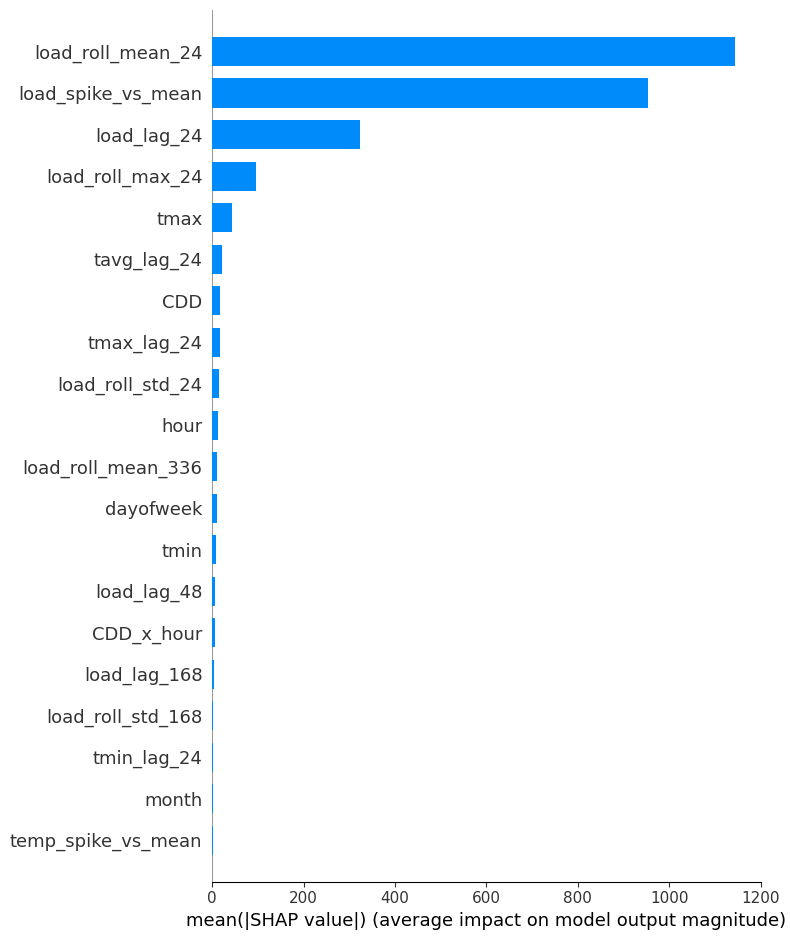

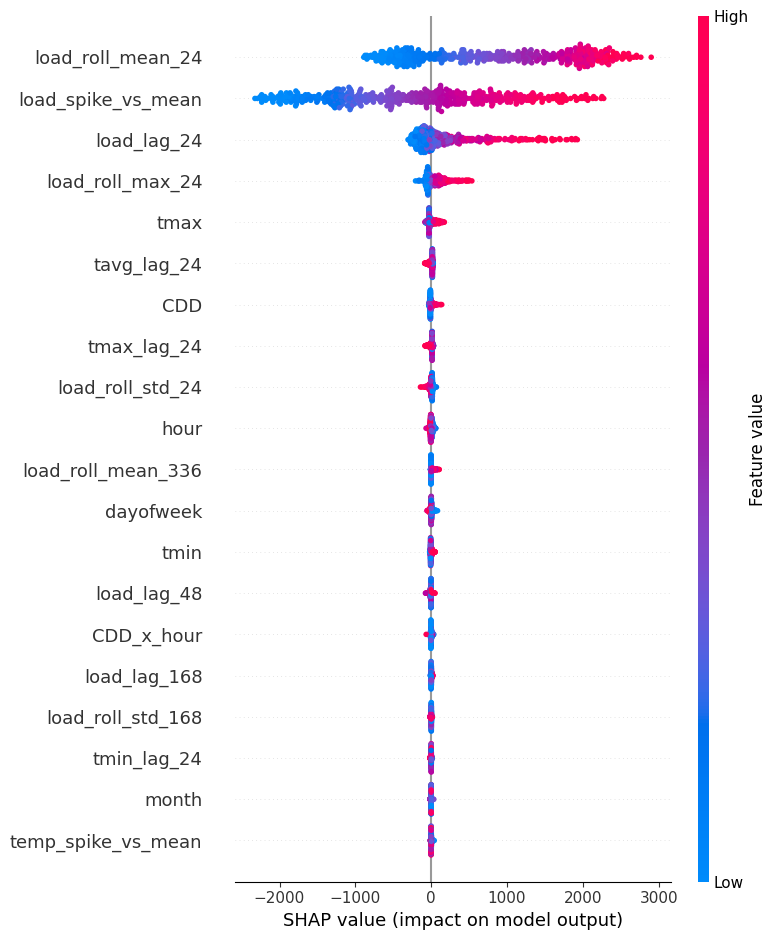


🔝 Top 20 SHAP Features:
1. load_roll_mean_24
2. load_spike_vs_mean
3. load_lag_24
4. load_roll_max_24
5. tmax
6. tavg_lag_24
7. CDD
8. tmax_lag_24
9. load_roll_std_24
10. hour
11. load_roll_mean_336
12. dayofweek
13. tmin
14. load_lag_48
15. CDD_x_hour
16. load_lag_168
17. load_roll_std_168
18. tmin_lag_24
19. month
20. temp_spike_vs_mean


In [ ]:
# === 1. Install SHAP ===
!pip install shap

# === 2. Imports ===
import shap
import numpy as np
import matplotlib.pyplot as plt

# === 3. Use smaller sample if large
sample_X = X_test.sample(n=500, random_state=42) if len(X_test) > 500 else X_test

# === 4. SHAP Explainer with 'interventional' mode
explainer = shap.Explainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer(sample_X)

# === 5. Summary Bar Plot (Feature Importance) ===
shap.summary_plot(shap_values, sample_X, plot_type="bar")

# === 6. Beeswarm Plot (Value vs Impact) ===
shap.summary_plot(shap_values, sample_X)

# === 7. Force Plot (First prediction) ===
shap.plots.force(shap_values[0])

# === 8. Top 20 SHAP Features
shap_importance = np.abs(shap_values.values).mean(axis=0)
top_idx = np.argsort(shap_importance)[::-1][:20]
top_features = sample_X.columns[top_idx].tolist()

print("\n🔝 Top 20 SHAP Features:")
for i, feat in enumerate(top_features, 1):
    print(f"{i}. {feat}")


/tmp/ipython-input-16-337437209.py:65: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')



🔁 SHAP-Based Model Performance:
📈 MAE: 69.94
📉 RMSE: 105.21
🎯 MAPE: 0.79%
📈 MAE: 70.73
📉 RMSE: 107.32
🎯 MAPE (2024): 0.80%


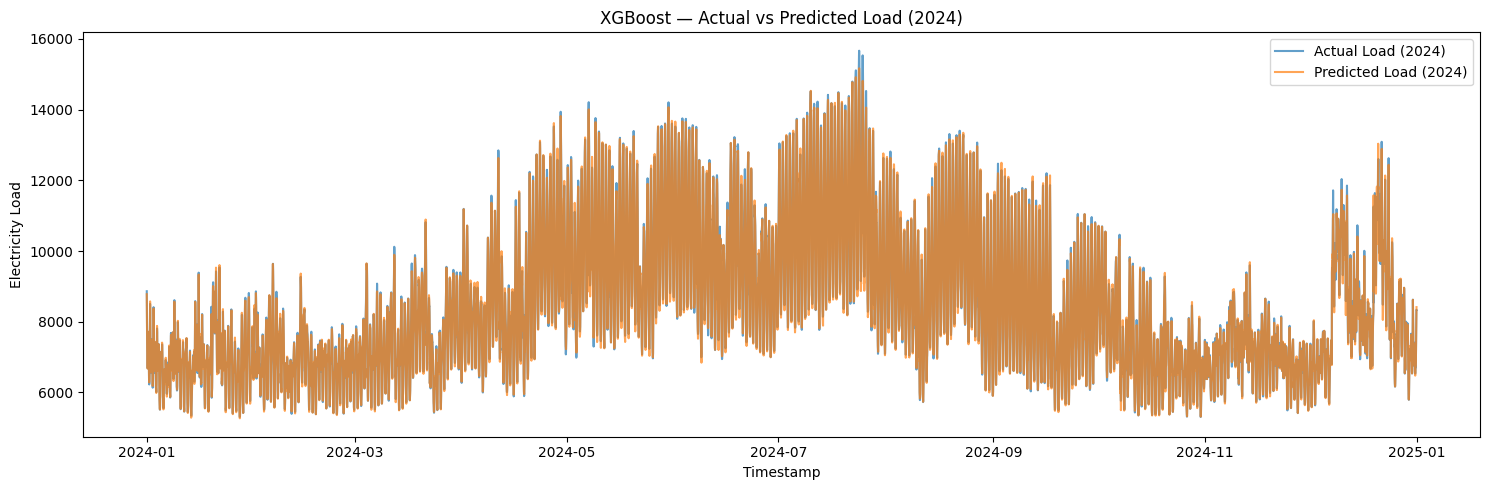

In [ ]:
# Install XGBoost if needed
!pip install --upgrade xgboost

# === Imports ===
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Merge All Sources ===
load_data['date'] = load_data['timestamp'].dt.date
merged = load_data.merge(weather, on='date', how='left').merge(holidays, on='date', how='left')
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)
merged = merged.drop(columns=['date'])

# === Feature Engineering ===
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

# Lag features
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_48'] = merged['load'].shift(48)
merged['load_lag_168'] = merged['load'].shift(168)

# Rolling load statistics
merged['load_roll_mean_24'] = merged['load'].shift(1).rolling(24).mean()
merged['load_roll_std_24'] = merged['load'].shift(1).rolling(24).std()
merged['load_roll_mean_168'] = merged['load'].shift(1).rolling(168).mean()
merged['load_roll_std_168'] = merged['load'].shift(1).rolling(168).std()
merged['load_roll_mean_336'] = merged['load'].shift(1).rolling(336).mean()
merged['load_roll_max_24'] = merged['load'].shift(1).rolling(24).max()

# Weather lag features
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmin_lag_24'] = merged['tmin'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged['prcp_lag_24'] = merged['prcp'].shift(24)

# Weather rolling stats
merged['tmax_roll_max_72'] = merged['tmax'].shift(1).rolling(72).max()
merged['tmin_roll_min_72'] = merged['tmin'].shift(1).rolling(72).min()

# Custom indicators
merged['is_weekend'] = merged['dayofweek'].isin([5,6]).astype(int)
merged['is_monday'] = (merged['dayofweek'] == 0).astype(int)
merged['is_friday'] = (merged['dayofweek'] == 4).astype(int)

# Interaction features
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']
merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['load_spike_vs_mean'] = (merged['load'] - merged['load_roll_mean_24']) / (merged['load_roll_mean_24'] + 1)
merged['temp_spike_vs_mean'] = (merged['tmax'] - merged['tavg']) / (merged['tavg'] + 1)

# Extreme event indicator
heat_threshold = merged["tmax"].quantile(0.95)
merged["is_extreme_heat_event"] = (merged["tmax"] > heat_threshold).astype(int)

# Drop any NaN rows caused by shifting/rolling
merged.dropna(inplace=True)

# Reconstruct timestamp index
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
merged = merged.set_index('timestamp')

top_shap_features = [
    'load_roll_mean_24', 'load_spike_vs_mean', 'load_lag_24', 'load_roll_max_24',
    'tmax', 'tavg_lag_24', 'CDD', 'tmax_lag_24', 'load_roll_std_24', 'hour',
    'load_roll_mean_336', 'dayofweek', 'tmin', 'load_lag_48', 'CDD_x_hour',
    'load_lag_168', 'load_roll_std_168', 'tmin_lag_24', 'month', 'temp_spike_vs_mean'
]

X_train_reduced = X_train[top_shap_features]
X_test_reduced = X_test[top_shap_features]

model_shap = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model_shap.fit(X_train_reduced, y_train)

y_pred_shap = model_shap.predict(X_test_reduced)
mae = mean_absolute_error(y_test, y_pred_shap)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_shap))
mape = np.mean(np.abs((y_test - y_pred_shap) / y_test)) * 100

print(f"\n🔁 SHAP-Based Model Performance:")
print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")


# === Train-Test Split ===
train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = test_df[feature_cols]
y_test = test_df['load']

# === Train XGBoost Model ===
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE (2024): {mape:.2f}%")

# === Plot Actual vs Predicted Load ===
plt.figure(figsize=(15,5))
plt.plot(test_df.index, y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test_df.index, y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('XGBoost — Actual vs Predicted Load (2024)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


               feature          VIF
3     load_roll_max_24  1659.994783
0    load_roll_mean_24  1233.908424
5          tavg_lag_24   925.548265
7          tmax_lag_24   638.804790
4                 tmax   569.873440
10  load_roll_mean_336   295.120501
17         tmin_lag_24   293.425784
2          load_lag_24   235.451125
12                tmin   187.758102
13         load_lag_48   134.940666
8     load_roll_std_24   120.174426
15        load_lag_168    87.388279
16   load_roll_std_168    42.374885
19  temp_spike_vs_mean    23.182974
6                  CDD    20.941341
14          CDD_x_hour     9.542771
9                 hour     8.964538
18               month     4.851415
1   load_spike_vs_mean     3.657234
11           dayofweek     3.441027


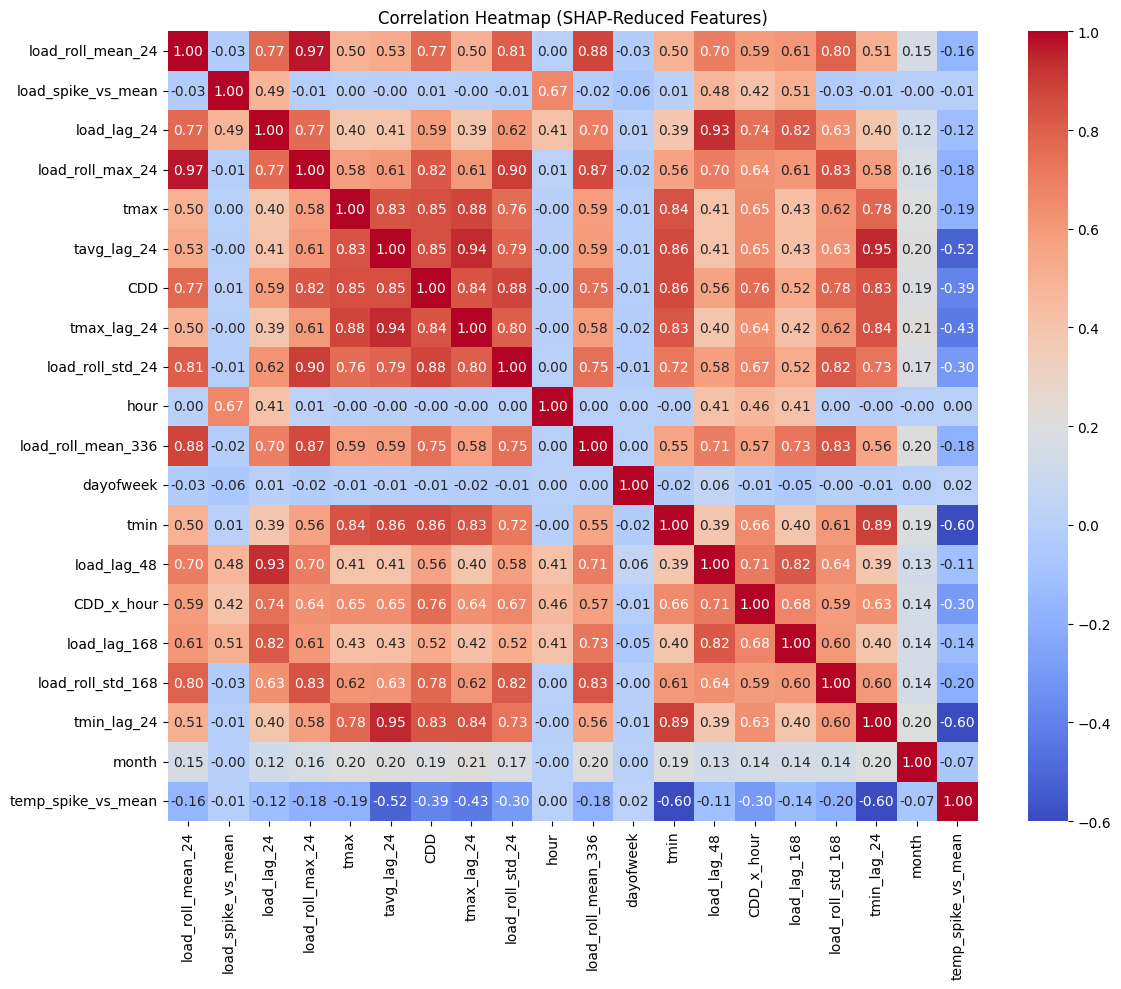

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
# If you already have your top SHAP features in a list:
top_shap_features = [
    'load_roll_mean_24', 'load_spike_vs_mean', 'load_lag_24', 'load_roll_max_24',
    'tmax', 'tavg_lag_24', 'CDD', 'tmax_lag_24', 'load_roll_std_24', 'hour',
    'load_roll_mean_336', 'dayofweek', 'tmin', 'load_lag_48', 'CDD_x_hour',
    'load_lag_168', 'load_roll_std_168', 'tmin_lag_24', 'month', 'temp_spike_vs_mean'
]

# Create the SHAP feature DataFrame from X_train
X_shap = X_train[top_shap_features]

# VIF
X_vif = X_shap.fillna(0)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values("VIF", ascending=False))

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_shap.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (SHAP-Reduced Features)")
plt.tight_layout()
plt.show()


In [ ]:
pip install pandas numpy seaborn matplotlib statsmodels


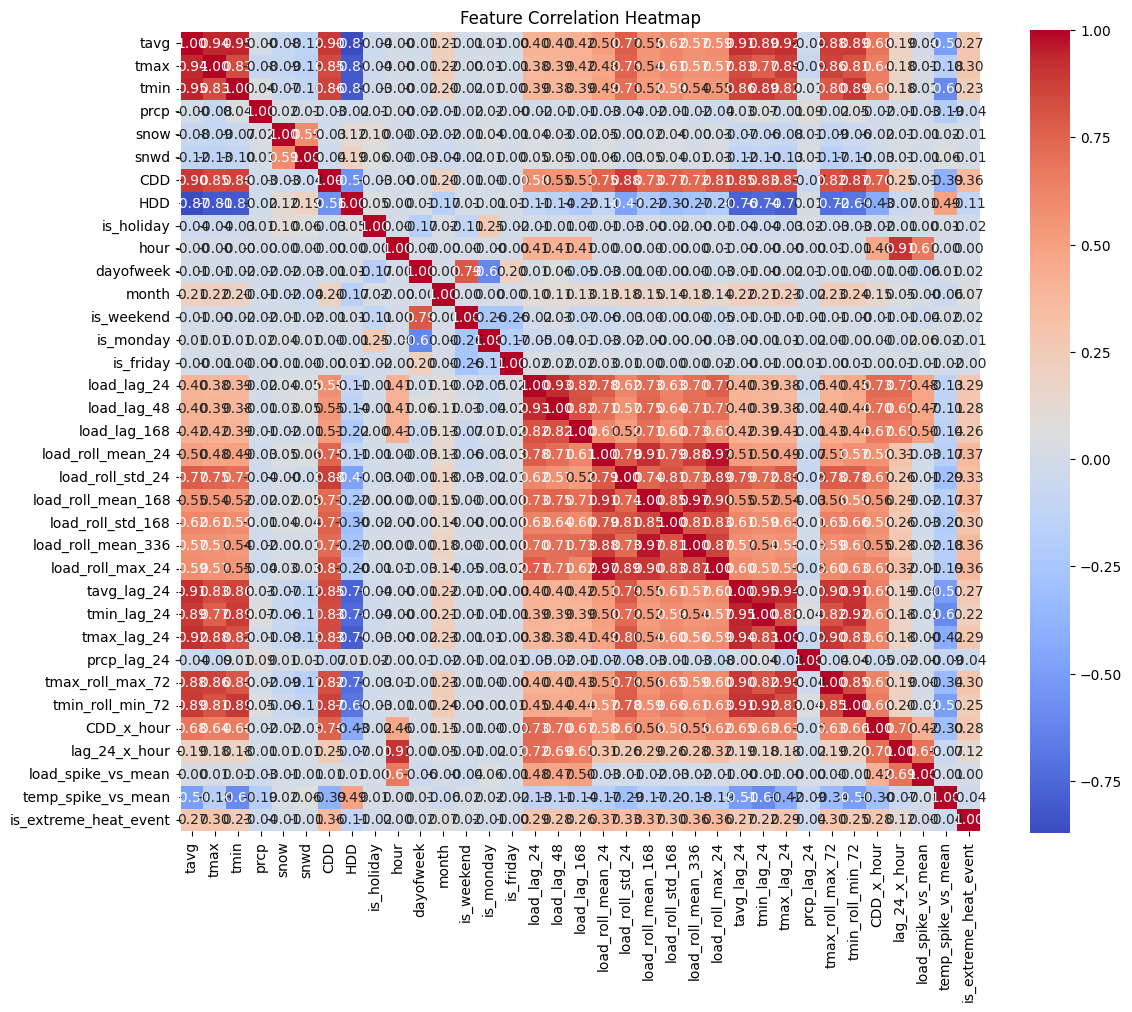

                  feature          VIF
0                    tavg  6125.443244
1                    tmax   198.316262
23       load_roll_max_24   104.677293
18      load_roll_mean_24    67.404788
31          lag_24_x_hour    55.338196
24            tavg_lag_24    42.641185
20     load_roll_mean_168    36.159324
33     temp_spike_vs_mean    29.230956
15            load_lag_24    27.269848
6                     CDD    26.598929
9                    hour    25.186006
19       load_roll_std_24    24.264947
25            tmin_lag_24    23.653125
26            tmax_lag_24    23.263699
22     load_roll_mean_336    22.431160
2                    tmin    17.190749
7                     HDD    12.413265
16            load_lag_48    11.580781
10              dayofweek    11.496508
29       tmin_roll_min_72    10.886181
30             CDD_x_hour    10.448281
12             is_weekend     8.395131
28       tmax_roll_max_72     8.105663
17           load_lag_168     6.592848
21      load_roll_std_168

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your feature DataFrame (before training XGBoost)
# If you already have X_train prepared, just use that
# X = your_dataframe[feature_cols]\
# Example: Define your feature matrix X

feature_cols = [
    'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_monday', 'is_friday',

    # Lag features
    'load_lag_24', 'load_lag_48', 'load_lag_168',

    # Rolling load stats
    'load_roll_mean_24', 'load_roll_std_24', 'load_roll_mean_168',
    'load_roll_std_168', 'load_roll_mean_336', 'load_roll_max_24',

    # Weather lag/rolling
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'tmax_roll_max_72', 'tmin_roll_min_72',

    # Custom interaction features
    'CDD_x_hour', 'lag_24_x_hour', 'load_spike_vs_mean', 'temp_spike_vs_mean',

    # Extreme event feature
    'is_extreme_heat_event'
]

X = merged[feature_cols]  # or whatever your main DataFrame is called


# --- Correlation Heatmap ---
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# --- Variance Inflation Factor (VIF) ---
# Add a small constant to avoid singular matrix errors (optional)
X_vif = X.copy()
X_vif = X_vif.fillna(0)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Show VIF scores
print(vif_data.sort_values("VIF", ascending=False))


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fill missing values
X_vif = X.fillna(0)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort and print
print(vif_data.sort_values("VIF", ascending=False))


                  feature          VIF
0                    tavg  6125.443244
1                    tmax   198.316262
23       load_roll_max_24   104.677293
18      load_roll_mean_24    67.404788
31          lag_24_x_hour    55.338196
24            tavg_lag_24    42.641185
20     load_roll_mean_168    36.159324
33     temp_spike_vs_mean    29.230956
15            load_lag_24    27.269848
6                     CDD    26.598929
9                    hour    25.186006
19       load_roll_std_24    24.264947
25            tmin_lag_24    23.653125
26            tmax_lag_24    23.263699
22     load_roll_mean_336    22.431160
2                    tmin    17.190749
7                     HDD    12.413265
16            load_lag_48    11.580781
10              dayofweek    11.496508
29       tmin_roll_min_72    10.886181
30             CDD_x_hour    10.448281
12             is_weekend     8.395131
28       tmax_roll_max_72     8.105663
17           load_lag_168     6.592848
21      load_roll_std_168

In [ ]:
# Drop top collinear features manually (VIF > 40 or highly redundant)
cols_to_drop = [
    'tavg',              # Extremely high VIF, strongly correlated with tmin/tmax
    'tmax',              # Redundant with tavg and tmin
    'tavg_lag_24',       # Redundant with above temps
    'load_roll_max_24',  # Strongly collinear with other rolling stats
    'load_roll_mean_24', # Same
    'load_roll_mean_168',
    'lag_24_x_hour'      # Engineered, high VIF
]

X = X.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} features for high multicollinearity:")
print(cols_to_drop)


Dropped 7 features for high multicollinearity:
['tavg', 'tmax', 'tavg_lag_24', 'load_roll_max_24', 'load_roll_mean_24', 'load_roll_mean_168', 'lag_24_x_hour']


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Make sure X has no NaNs
X_vif = X.fillna(0)

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort and display
vif_data = vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)
print(vif_data)


                  feature         VIF
0        tmax_roll_max_72  384.564467
1             tmax_lag_24  284.416458
2      load_roll_mean_336  193.418139
3             load_lag_24  162.164558
4             load_lag_48  139.887777
5             tmin_lag_24  133.292071
6                    tmin  128.481546
7        tmin_roll_min_72  105.779949
8            load_lag_168   85.876616
9        load_roll_std_24   43.090404
10      load_roll_std_168   41.748558
11              dayofweek   36.644242
12                    CDD   24.000134
13             is_weekend   11.466963
14             CDD_x_hour    9.383000
15                   hour    9.119407
16     temp_spike_vs_mean    8.642430
17                  month    4.795932
18                    HDD    4.403932
19     load_spike_vs_mean    3.411893
20              is_monday    3.094476
21              is_friday    2.946610
22                   snwd    1.644919
23                   snow    1.575493
24  is_extreme_heat_event    1.291203
25          

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==== Feature Engineering (make sure `merged` is defined beforehand) ====
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

# Lags
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_48'] = merged['load'].shift(48)
merged['load_lag_168'] = merged['load'].shift(168)

# Rolling stats
merged['load_roll_mean_24'] = merged['load'].shift(1).rolling(24).mean()
merged['load_roll_std_24'] = merged['load'].shift(1).rolling(24).std()
merged['load_roll_mean_168'] = merged['load'].shift(1).rolling(168).mean()
merged['load_roll_std_168'] = merged['load'].shift(1).rolling(168).std()
merged['load_roll_mean_336'] = merged['load'].shift(1).rolling(336).mean()
merged['load_roll_max_24'] = merged['load'].shift(1).rolling(24).max()

# Weather lag
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmin_lag_24'] = merged['tmin'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged['prcp_lag_24'] = merged['prcp'].shift(24)

# Weather roll
merged['tmax_roll_max_72'] = merged['tmax'].shift(1).rolling(72).max()
merged['tmin_roll_min_72'] = merged['tmin'].shift(1).rolling(72).min()

# Custom features
merged['is_weekend'] = merged['dayofweek'].isin([5,6]).astype(int)
merged['is_monday'] = (merged['dayofweek'] == 0).astype(int)
merged['is_friday'] = (merged['dayofweek'] == 4).astype(int)
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']
merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['load_spike_vs_mean'] = (merged['load'] - merged['load_roll_mean_24']) / (merged['load_roll_mean_24'] + 1)
merged['temp_spike_vs_mean'] = (merged['tmax'] - merged['tavg']) / (merged['tavg'] + 1)
heat_threshold = merged["tmax"].quantile(0.95)
merged["is_extreme_heat_event"] = (merged["tmax"] > heat_threshold).astype(int)

# Drop NA
merged.dropna(inplace=True)

# ==== Feature Columns ====
feature_cols = [
    'load', 'tavg', 'tmax', 'tmin', 'prcp', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_monday', 'is_friday',
    'load_lag_24', 'load_lag_48', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24', 'load_roll_mean_168',
    'load_roll_std_168', 'load_roll_mean_336', 'load_roll_max_24',
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'tmax_roll_max_72', 'tmin_roll_min_72',
    'CDD_x_hour', 'lag_24_x_hour', 'load_spike_vs_mean', 'temp_spike_vs_mean',
    'is_extreme_heat_event'
]

# ==== Normalize and Create Sequences ====
merged_lstm = merged.dropna(subset=feature_cols).copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged_lstm[feature_cols])
scaled_df = pd.DataFrame(scaled, columns=feature_cols, index=merged_lstm.index)

# Sequence generator
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i][0])  # 'load' is first column
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(scaled_df.values, seq_length=24)

# ==== Train/Test Split ====
split_index = int(len(X_all) * 0.85)
X_train, y_train = X_all[:split_index], y_all[:split_index]
X_test, y_test = X_all[split_index:], y_all[split_index:]

# ==== Build & Train Model ====
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ==== Predict and Evaluate ====
y_pred_scaled = model.predict(X_test)
y_pred = y_pred_scaled.flatten() * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_true = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")

# ==== Plot ====
plt.figure(figsize=(15,5))
plt.plot(y_true, label='Actual Load', alpha=0.7)
plt.plot(y_pred, label='Predicted Load', alpha=0.7)
plt.title('LSTM — Actual vs Predicted Load with SHAP Features')
plt.xlabel('Time Steps')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Define top 5% peak hours based on actual 2024 load
threshold = y_test.quantile(0.95)
is_peak = y_test > threshold

X_peak = X_test[is_peak]
y_peak = y_test[is_peak]


 96%|=================== | 422/440 [00:20<00:00]       

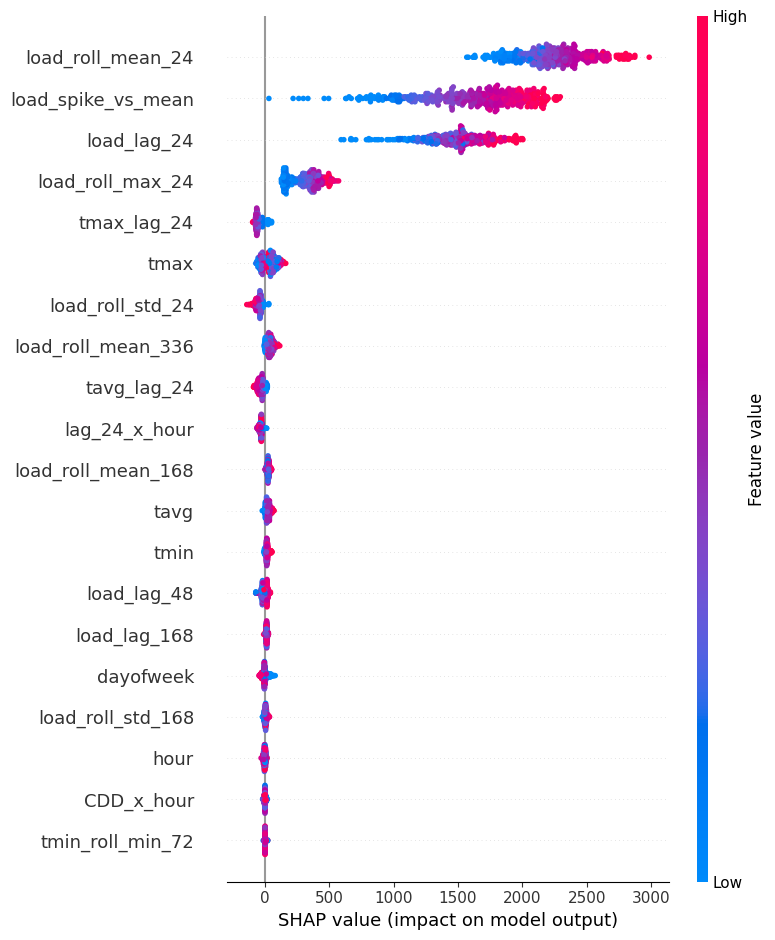

In [ ]:
import shap
explainer = shap.Explainer(model, X_train, feature_names=feature_cols)
shap_values_peak = explainer(X_peak)

# Summary plot for peak hours
shap.summary_plot(shap_values_peak, X_peak)


In [ ]:
peak_threshold = y_test.quantile(0.90)
peak_idx = y_test[y_test > peak_threshold].index
X_peaks = X_test.loc[peak_idx]
y_peaks = y_test.loc[peak_idx]


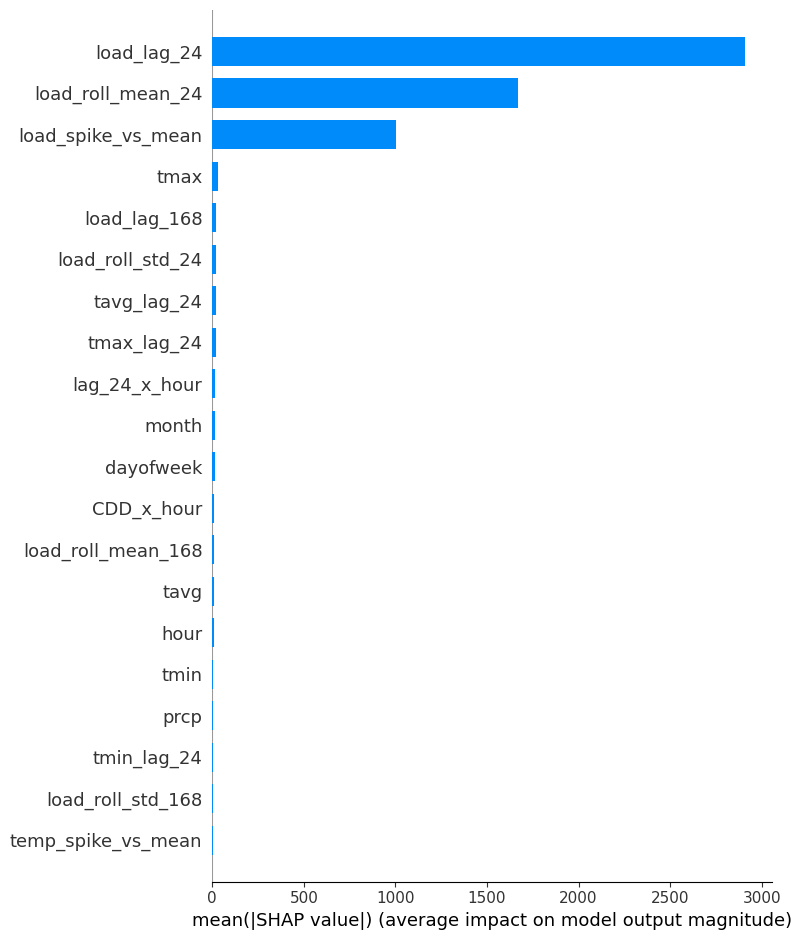

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_peaks)

shap.summary_plot(shap_values, X_peaks, plot_type="bar")


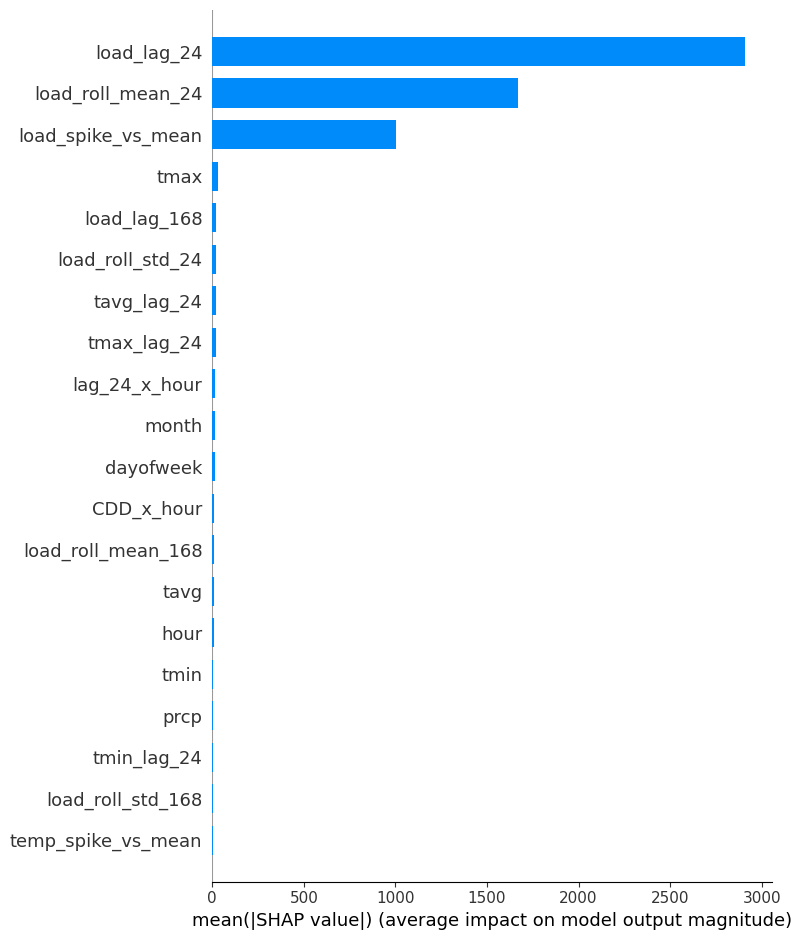

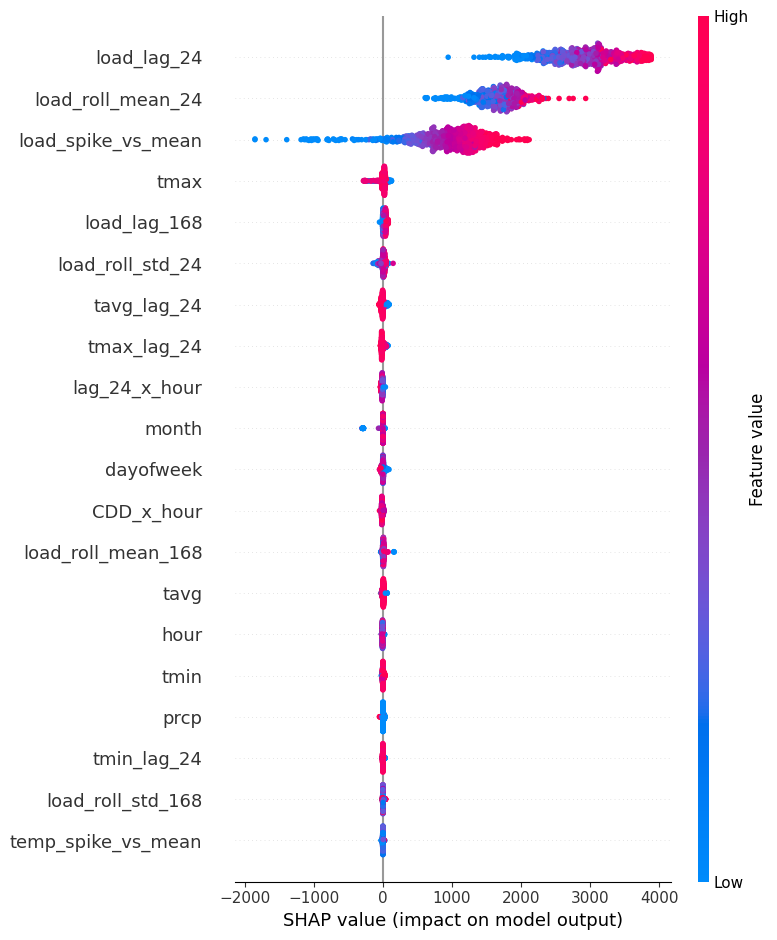

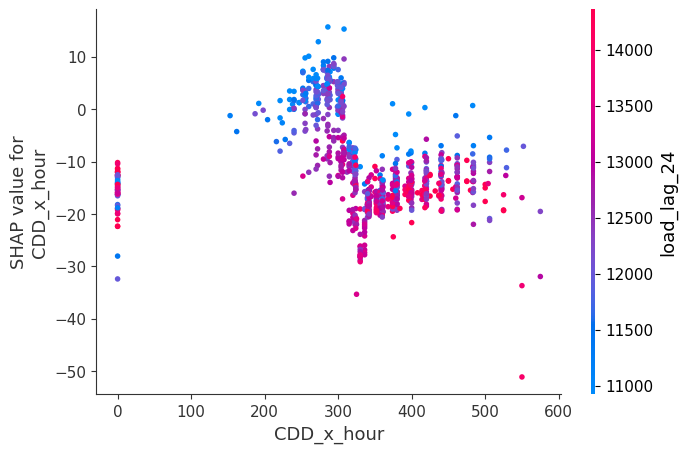

In [ ]:
shap.summary_plot(shap_values, X_peaks, plot_type="bar")
shap.summary_plot(shap_values, X_peaks)
shap.dependence_plot("CDD_x_hour", shap_values.values, X_peaks)


/tmp/ipython-input-20-1352547500.py:66: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')


📈 MAE: 69.26
📉 RMSE: 102.52
🎯 MAPE (2024): 0.78%


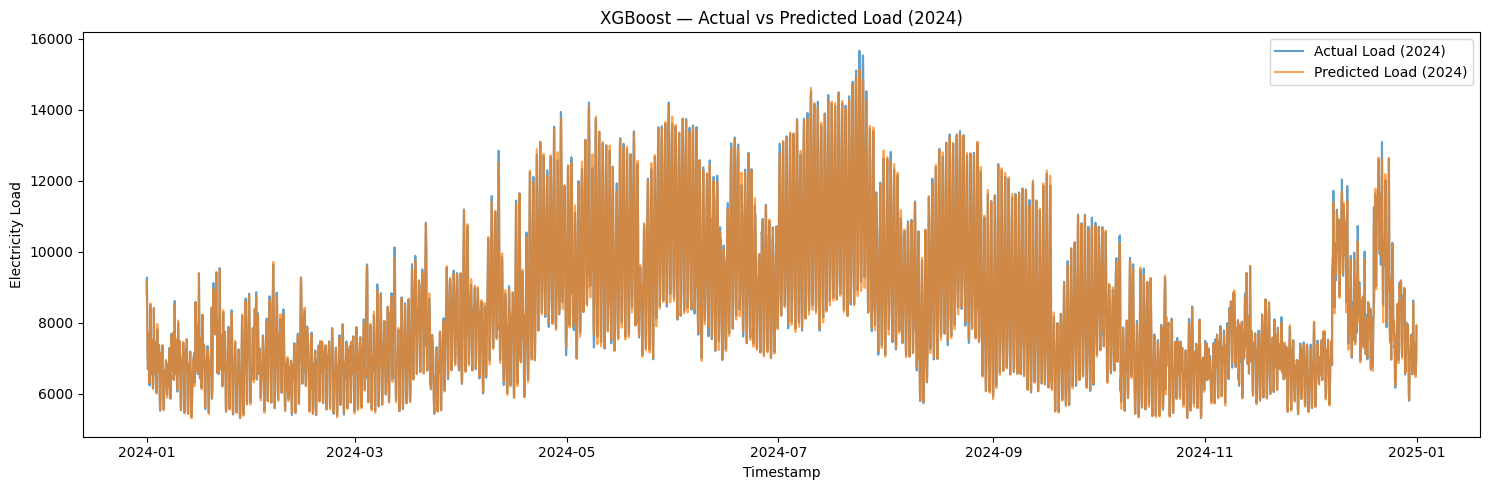

In [ ]:
!pip install --upgrade xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# === Merge All ===
load_data['date'] = load_data['timestamp'].dt.date
merged = load_data.merge(weather, on='date', how='left').merge(holidays, on='date', how='left')
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)
merged = merged.drop(columns=['date'])


# === Feature Engineering ===
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

# Lag Features
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_48'] = merged['load'].shift(48)
merged['load_lag_168'] = merged['load'].shift(168)

# Rolling Load Stats
merged['load_roll_mean_24'] = merged['load'].rolling(window=24).mean()
merged['load_roll_std_24'] = merged['load'].rolling(window=24).std()
merged['load_roll_max_24'] = merged['load'].rolling(window=24).max()
merged['load_roll_mean_168'] = merged['load'].rolling(window=168).mean()
merged['load_roll_std_168'] = merged['load'].rolling(window=168).std()
merged['load_roll_mean_336'] = merged['load'].rolling(window=336).mean()  # New weekly trend
merged["temp_volatility_24h"] = merged["tmax"] - merged["tmin"]
merged["tmax_x_hour"] = merged["tmax"] * merged["hour"]
merged["load_roll_max_168"] = merged["load"].rolling(window=168, min_periods=1).max()

# Weather Lag Features
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged["is_extreme_heat_event"] = (merged["tmax"] > merged["tmax"].quantile(0.95)).astype(int)
merged["tmax_roll_max_72"] = merged["tmax"].rolling(window=72, min_periods=1).max()

# Temperature
merged['temp_spike_vs_mean'] = (merged['tmax'] - merged['tavg']) / (merged['tavg'] + 1)

# Load Dynamics
merged['load_spike_vs_mean'] = (merged['load'] - merged['load_roll_mean_24']) / (merged['load_roll_mean_24'] + 1)

# Composite Interaction Terms
merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']

# Other supporting features
merged['tmin_roll_min_72'] = merged['tmin'].shift(1).rolling(72).min()
merged['is_weekend'] = merged['dayofweek'].isin([5, 6]).astype(int)

# Drop missing values caused by lag/rolling ops
merged.dropna(inplace=True)



# === Reconstruct Timestamp Index ===
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')
merged = merged.set_index('timestamp')

feature_cols = [
    'load_lag_24', 'load_lag_48', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24', 'load_roll_max_24',
    'load_roll_mean_168', 'load_roll_std_168', 'load_roll_mean_336',
    'load_spike_vs_mean', 'lag_24_x_hour',

    'tmax', 'tavg', 'tmin',
    'tmax_lag_24', 'tavg_lag_24', 'temp_spike_vs_mean',

    'CDD', 'HDD', 'CDD_x_hour', 'prcp',

    'hour', 'dayofweek', 'month',
    'is_weekend', 'tmin_roll_min_72'
]



feature_cols += [
    "is_extreme_heat_event", "tmax_roll_max_72",
    "temp_volatility_24h", "tmax_x_hour", "load_roll_max_168"
]

train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = tfeature_cols += [
    "is_extreme_heat_event", "tmax_roll_max_72",
    "temp_volatility_24h", "tmax_x_hour", "load_roll_max_168"
]
est_df[feature_cols]
y_test = test_df['load']

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE (2024): {mape:.2f}%")

# === Plot ===
plt.figure(figsize=(15,5))
plt.plot(test_df.index, y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test_df.index, y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('XGBoost — Actual vs Predicted Load (2024)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


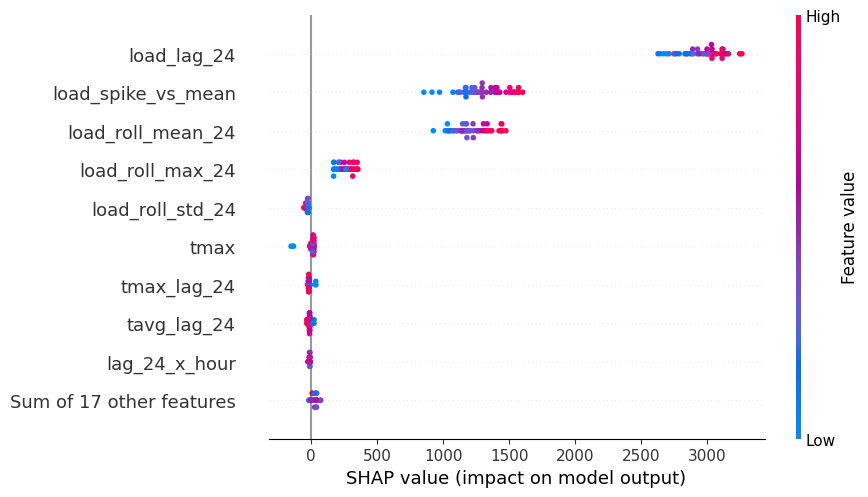

In [ ]:
# Step 1: Define August peak period
august_peak_df = test_df.loc['2024-08-01':'2024-08-31'].copy()

# Optional: Only focus on high load values (e.g., above 95th percentile)
load_threshold = y_test.quantile(0.95)
august_peak_df = august_peak_df[august_peak_df['load'] > load_threshold]
X_august_peak = august_peak_df[feature_cols]
import shap

# Reuse trained model and create explainer
explainer = shap.Explainer(model)
shap_values_august = explainer(X_august_peak)

# Plot SHAP summary just for peak
shap.plots.beeswarm(shap_values_august)


In [ ]:
# Drop NaNs first (if not already done)
merged = merged.dropna().copy()

# Reconstruct timestamp column with correct number of rows
start_timestamp = pd.Timestamp('2016-01-01 00:00:00')
merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')

# Set timestamp as index and sort
merged = merged.set_index('timestamp')
merged = merged.sort_index()


/tmp/ipython-input-23-4087223065.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start_timestamp, periods=len(merged), freq='H')


In [ ]:
# === Baseline Feature Engineering ===
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month
merged['is_weekend'] = merged['dayofweek'].isin([5,6]).astype(int)

# Basic lag features
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_168'] = merged['load'].shift(168)

# Fill NA and drop rows with NA
merged.dropna(inplace=True)


KeyError: 'timestamp'

In [ ]:
# Rebuild timestamps safely
merged = merged.dropna().copy()

# Ensure the range matches the number of rows
start = pd.Timestamp("2016-01-01 00:00:00")
end = start + pd.Timedelta(hours=len(merged)-1)

# Assign timestamp
merged['timestamp'] = pd.date_range(start=start, end=end, freq='H')

# Set and sort index
merged = merged.set_index('timestamp')
merged = merged.sort_index()


/tmp/ipython-input-25-1525749080.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start, end=end, freq='H')


In [ ]:
print("Number of rows:", len(merged))
print("Any NaNs left?", merged.isna().sum().sum())


Number of rows: 81783
Any NaNs left? 0


In [ ]:
merged['timestamp'] = load_data['timestamp'].iloc[-len(merged):].reset_index(drop=True)
merged.index = pd.to_datetime(merged['timestamp'])
merged = merged.sort_index()


In [ ]:
# Rebuild timestamps safely
merged = merged.dropna().copy()

# Ensure the range matches the number of rows
start = pd.Timestamp("2016-01-01 00:00:00")
end = start + pd.Timedelta(hours=len(merged)-1)

# Assign timestamp
merged['timestamp'] = pd.date_range(start=start, end=end, freq='H')

# Set and sort index
merged = merged.set_index('timestamp')
merged = merged.sort_index()


/tmp/ipython-input-28-1525749080.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start=start, end=end, freq='H')


/tmp/ipython-input-3-2511705797.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['timestamp'] = pd.date_range(start='2016-01-01 00:00:00', periods=len(merged), freq='H')


X_train shape: (70128, 14)
y_train shape: (70128,)
X_test shape: (8784, 14)
y_test shape: (8784,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 70128, number of used features: 14
[LightGBM] [Info] Start training from score 7171.444051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

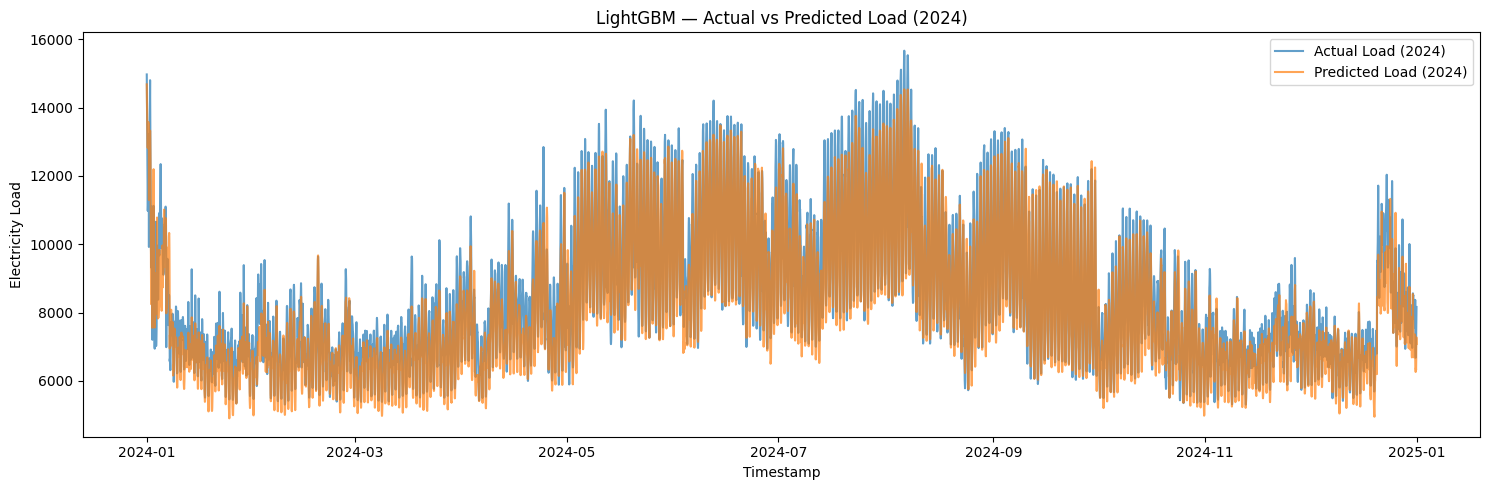

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

merged = merged.copy()
merged['timestamp'] = pd.date_range(start='2016-01-01 00:00:00', periods=len(merged), freq='H')
merged = merged.set_index('timestamp')
merged = merged.sort_index()

merged.dropna(inplace=True)

feature_cols = [
    'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'load_lag_24', 'load_lag_168'
]

train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = test_df[feature_cols]
y_test = test_df['load']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

assert not X_train.isnull().values.any(), "X_train has NaNs"
assert not y_train.isnull().values.any(), "y_train has NaNs"

model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE (2024): {mape:.2f}%")

# === Step 9: Plot predictions ===
plt.figure(figsize=(15,5))
plt.plot(test_df.index, y_test, label='Actual Load (2024)', alpha=0.7)
plt.plot(test_df.index, y_pred, label='Predicted Load (2024)', alpha=0.7)
plt.title('LightGBM — Actual vs Predicted Load (2024)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


100%|===================| 8780/8784 [03:09<00:00]       

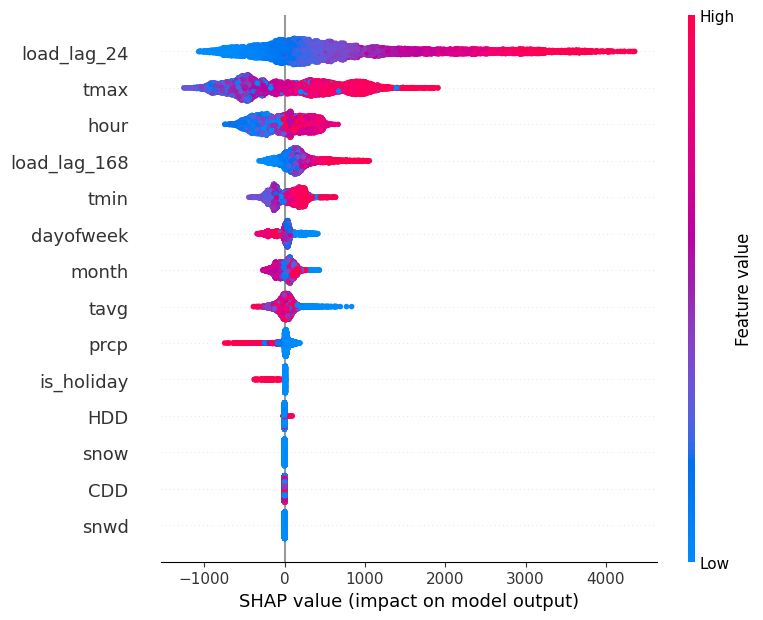

In [ ]:
import sha
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# === Step 5: SHAP analysis ===
background = X_train.sample(100, random_state=42)
explainer = shap.Explainer(model, background)
shap_values = explainer(X_test, check_additivity=False)

# === Step 6: Plot SHAP summary ===
shap.plots.beeswarm(shap_values, max_display=20)


In [ ]:
# Interaction terms
merged["lag_24_x_hour"] = merged["load_lag_24"] * merged["hour"]
merged["CDD_x_hour"] = merged["CDD"] * merged["hour"]

# Peak sensitivity
merged["load_spike_vs_mean"] = (merged["load"] - merged["load_roll_mean_168"]) / (merged["load_roll_std_168"] + 1e-5)

# Temperature extremes
merged["temp_spike_vs_mean"] = (merged["tmax"] - merged["tavg"]).clip(lower=0)

# Binary event
merged["is_extreme_heat_event"] = (merged["tmax"] > merged["tmax"].quantile(0.95)).astype(int)


In [ ]:
feature_cols = [
    'load_lag_24', 'load_lag_168',
    'load_roll_mean_168', 'load_roll_std_168',
    'tmax', 'tavg', 'prcp',
    'hour', 'dayofweek', 'month',
    'lag_24_x_hour', 'CDD_x_hour', 'load_spike_vs_mean',
    'temp_spike_vs_mean', 'is_extreme_heat_event'
]


In [ ]:
train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']

X_train = train_df[feature_cols]
y_train = train_df['load']
X_test = test_df[feature_cols]
y_test = test_df['load']


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=7,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"📈 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 MAPE (2024): {mape:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 70128, number of used features: 15
[LightGBM] [Info] Start training from score 7171.444051
📈 MAE: 105.29
📉 RMSE: 169.31
🎯 MAPE (2024): 1.20%


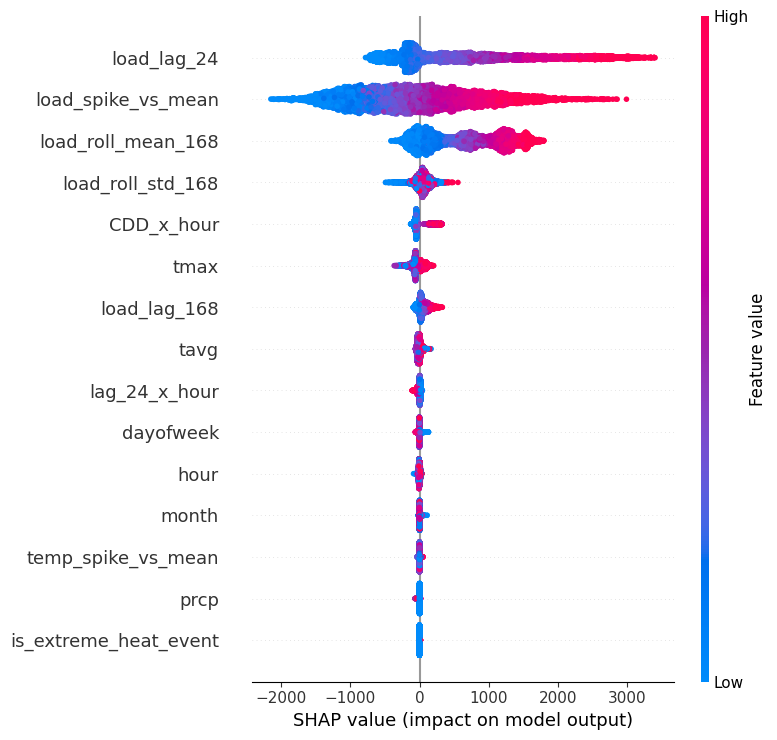

In [ ]:
import shap
import matplotlib.pyplot as plt

# Use TreeExplainer for LightGBM
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, plot_type="dot", max_display=20)


In [ ]:
!pip install lightgbm shap --quiet


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2168
[LightGBM] [Info] Number of data points in the train set: 69960, number of used features: 16
[LightGBM] [Info] Start training from score 7418.959487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
📈 MAE: 85.03
📉 RMSE: 136.38
🎯 MAPE (2024): 0.98%
🔥 Peak MAPE (Top 

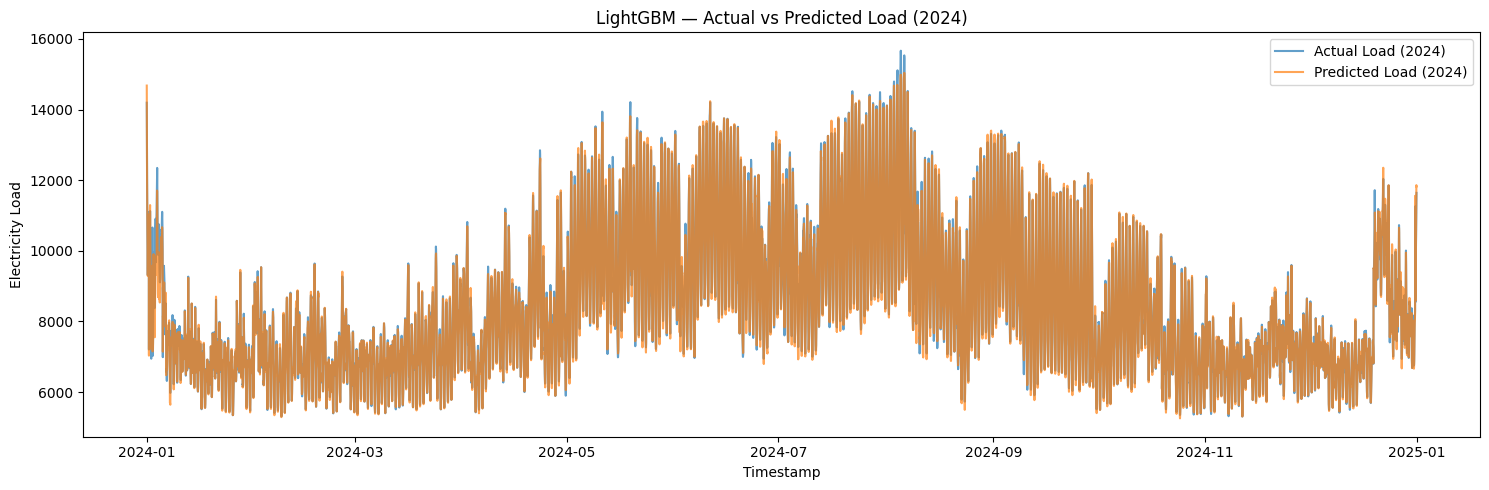

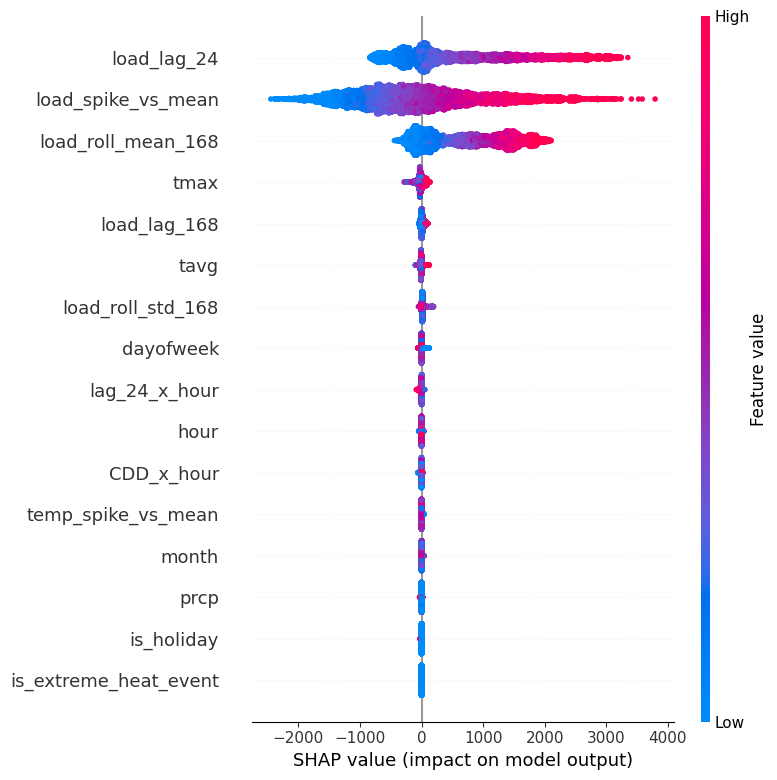

In [ ]:
a

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 70104, number of used features: 20
[LightGBM] [Info] Start training from score 7172.068491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

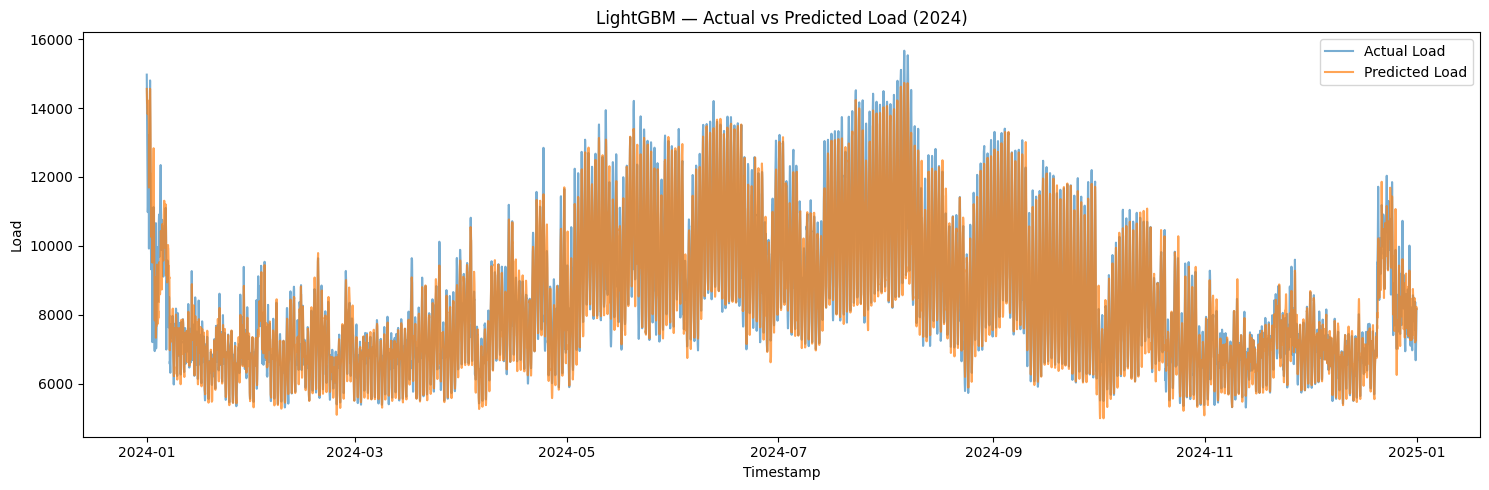

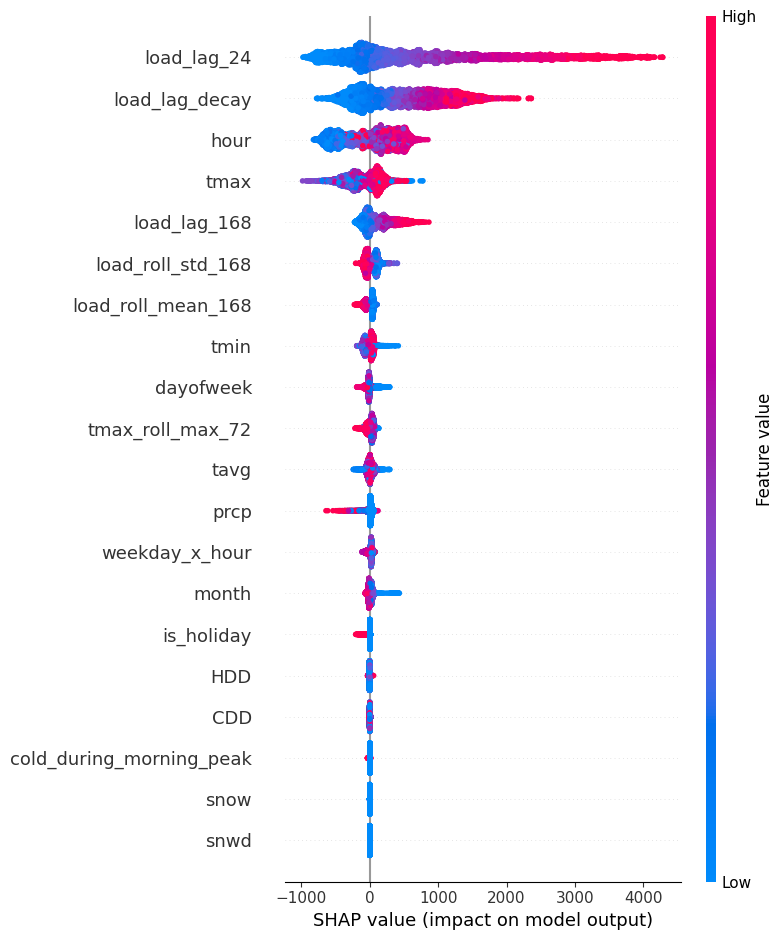

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap
import warnings
warnings.filterwarnings("ignore")

merged['timestamp'] = pd.date_range(start='2016-01-01 00:00:00', periods=len(merged), freq='H')
merged = merged.set_index('timestamp').sort_index()

merged["tmax_roll_max_72"] = merged["tmax"].rolling(window=72, min_periods=1).max()
merged["cold_during_morning_peak"] = (
    (merged["tmin"] < merged["tmin"].quantile(0.1)) &
    (merged.index.hour >= 6) & (merged.index.hour <= 9)
).astype(int)
merged["weekday_x_hour"] = (merged.index.dayofweek * 24) + merged.index.hour
merged["load_lag_decay"] = sum([merged['load'].shift(i) * (0.9 ** i) for i in range(1, 25)])

merged.dropna(inplace=True)

feature_cols = [
    'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd',
    'CDD', 'HDD', 'is_holiday', 'hour', 'dayofweek', 'month',
    'load_lag_24', 'load_lag_168', 'load_roll_mean_168', 'load_roll_std_168',
    'load_spike_vs_mean', 'CDD_x_hour', 'lag_24_x_hour', 'temp_spike_vs_mean',
    'is_extreme_heat_event', 'tmax_roll_max_72', 'cold_during_morning_peak',
    'weekday_x_hour', 'load_lag_decay'
]
feature_cols = [col for col in feature_cols if col in merged.columns]

train_df = merged.loc[:'2023-12-31']
test_df = merged.loc['2024-01-01':'2024-12-31']
X_train, y_train = train_df[feature_cols], train_df['load']
X_test, y_test = test_df[feature_cols], test_df['load']

model = lgb.LGBMRegressor(
    n_estimators=700,
    learning_rate=0.03,
    max_depth=7,
    num_leaves=40,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

threshold = y_test.quantile(0.95)
peak_mask = y_test >= threshold
peak_mape = np.mean(np.abs((y_test[peak_mask] - y_pred[peak_mask]) / y_test[peak_mask])) * 100

print(f" MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f" MAPE (2024): {mape:.2f}%")
print(f" Peak MAPE (Top 5% Load Hours): {peak_mape:.2f}%")

plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual Load', alpha=0.6)
plt.plot(y_test.index, y_pred, label='Predicted Load', alpha=0.7)
plt.title("LightGBM — Actual vs Predicted Load (2024)")
plt.xlabel("Timestamp")
plt.ylabel("Load")
plt.legend()
plt.tight_layout()
plt.show()

explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, max_display=20)


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0525 - val_loss: 0.0186
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0213 - val_loss: 0.0180
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0200 - val_loss: 0.0187
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0201 - val_loss: 0.0204
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0204 - val_loss: 0.0183
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0200 - val_loss: 0.0184
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0196 - val_loss: 0.0186
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
📈 MAE: 82.16
📉 RMSE: 102.31
🎯 MAPE: 8.21%


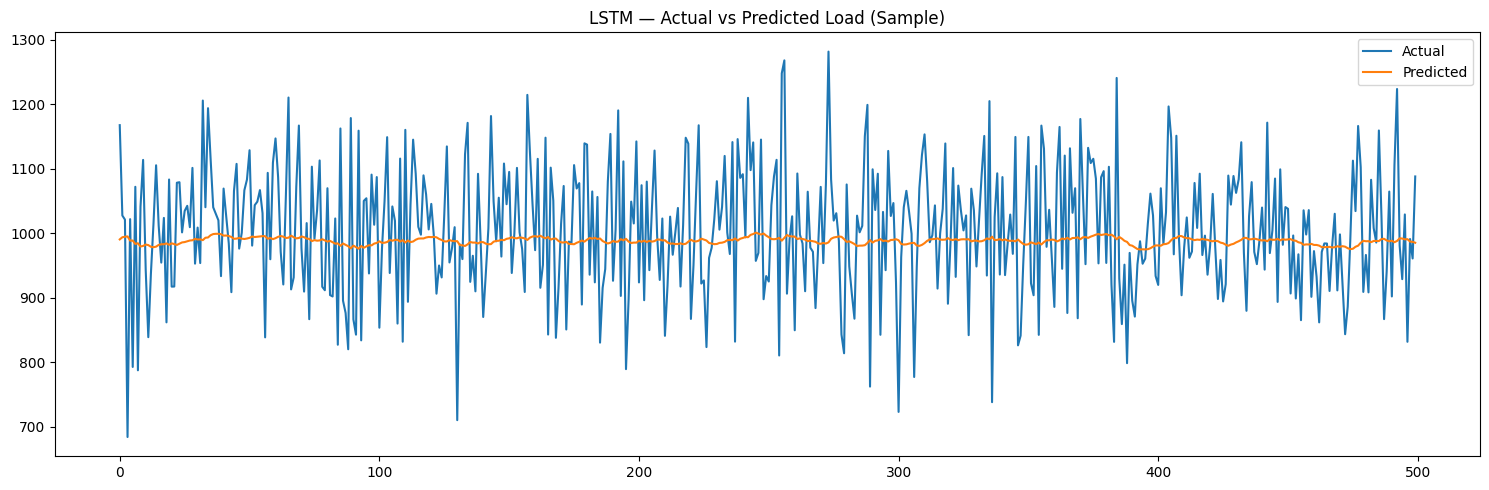

In [ ]:
# Include more features before scaling
feature_cols = ['load', 'tavg', 'tmin', 'tmax', 'prcp', 'CDD', 'HDD', 'hour', 'dayofweek', 'month', 'is_holiday']
merged = merged.dropna(subset=feature_cols)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged[feature_cols])
scaled_df = pd.DataFrame(scaled, index=merged.index, columns=feature_cols)

# Updated sequence creation
def create_multivariate_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length][target_col])
    return np.array(X), np.array(y)

SEQ_LENGTH = 24
X, y = create_multivariate_sequences(scaled_df, target_col='load', seq_length=SEQ_LENGTH)


KeyError: ['tavg', 'tmin', 'tmax', 'prcp', 'CDD', 'HDD', 'hour', 'dayofweek', 'month', 'is_holiday']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

if 'timestamp' not in merged.columns:
    if merged.index.name == 'timestamp':
        merged = merged.reset_index()

merged['CDD'] = (merged['tavg'] - 65).clip(lower=0)
merged['HDD'] = (65 - merged['tavg']).clip(lower=0)
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)

merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

feature_cols = [
    'load', 'tavg', 'tmin', 'tmax', 'prcp', 'CDD', 'HDD',
    'hour', 'dayofweek', 'month', 'is_holiday'
]

merged_lstm = merged.dropna(subset=feature_cols).copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged_lstm[feature_cols])
scaled_df = pd.DataFrame(scaled, columns=feature_cols, index=merged_lstm.index)

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i][0])  # target is 'load'
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(scaled_df.values, seq_length=24)

total_samples = len(X_all)
split_index = int(total_samples * 0.85)  # 85% train, 15% test
X_train, y_train = X_all[:split_index], y_all[:split_index]
X_test, y_test = X_all[split_index:], y_all[split_index:]

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

y_pred_scaled = model.predict(X_test)
y_pred = y_pred_scaled.flatten() * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_true = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")

plt.figure(figsize=(15,5))
plt.plot(y_true, label='Actual Load', alpha=0.7)
plt.plot(y_pred, label='Predicted Load', alpha=0.7)
plt.title('LSTM — Actual vs Predicted Load')
plt.xlabel('Time Steps')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
941/981 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0097 - val_loss: 7.5079e-04
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 9.9463e-04 - val_loss: 5.9499e-04
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 7.9768e-04 - val_loss: 3.6543e-04
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.0678e-04 - val_loss: 3.2310e-04
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.2139e-04 - val_loss: 2.9987e-04
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 6.7392e-04 - val_loss: 3.9957e-04
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 6.0676e-04 - val_loss: 2.9295e-04
Epoch 9/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.9536e-04 - val_loss: 3.4674e-04
Epoch 10/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.7019e-04 - val_loss: 3.2143e-04
Epoch 11/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.9129e-0

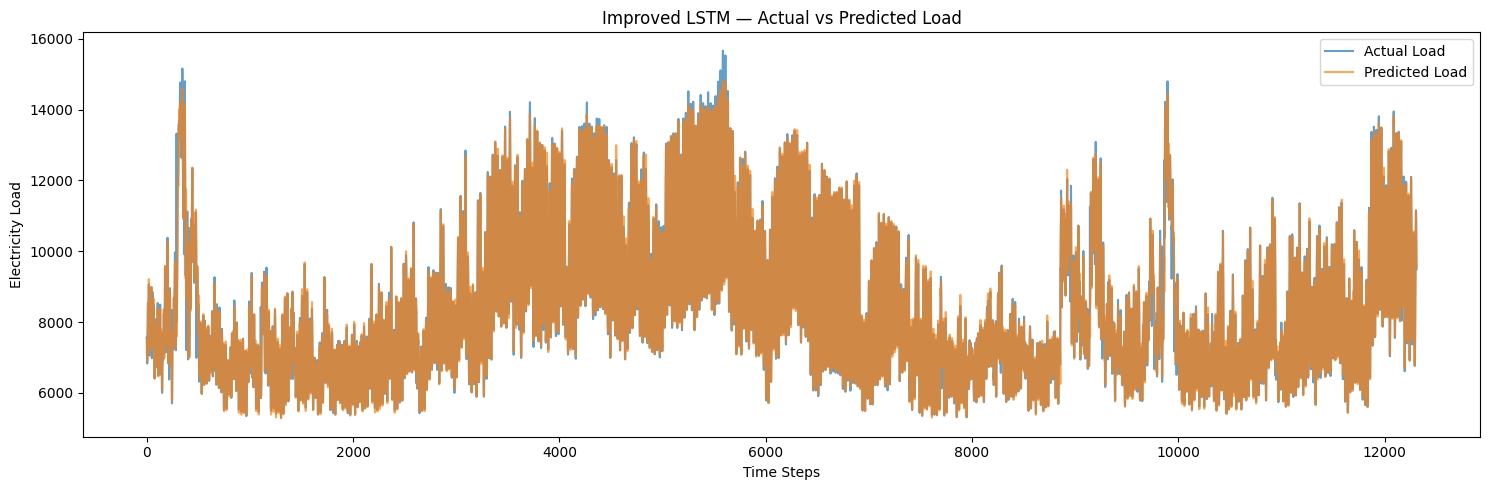

In [ ]:
!pip install tensorflow --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# ==== Feature Columns ====
feature_cols = [
    'load', 'tavg', 'tmin', 'tmax', 'prcp', 'CDD', 'HDD',
    'hour', 'dayofweek', 'month', 'is_holiday'
]

# ==== Drop NA and Scale ====
merged_lstm = merged.dropna(subset=feature_cols).copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged_lstm[feature_cols])
scaled_df = pd.DataFrame(scaled, columns=feature_cols, index=merged_lstm.index)

# ==== Sequence Generation ====
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i][0])  # target = 'load'
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(scaled_df.values, seq_length=24)

# ==== Train/Test Split ====
split_index = int(len(X_all) * 0.85)
X_train, y_train = X_all[:split_index], y_all[:split_index]
X_test, y_test = X_all[split_index:], y_all[split_index:]

# ==== Build Model ====
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# ==== Train ====
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ==== Predict and Inverse Scale ====
y_pred_scaled = model.predict(X_test)
y_pred = y_pred_scaled.flatten() * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_true = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

# ==== Evaluate ====
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")

# ==== Plot ====
plt.figure(figsize=(15,5))
plt.plot(y_true, label='Actual Load', alpha=0.7)
plt.plot(y_pred, label='Predicted Load', alpha=0.7)
plt.title('Improved LSTM — Actual vs Predicted Load')
plt.xlabel('Time Steps')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0069 - val_loss: 5.8012e-04
Epoch 2/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.1697e-04 - val_loss: 8.6662e-04
Epoch 3/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.4141e-04 - val_loss: 3.1632e-04
Epoch 4/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.6952e-04 - val_loss: 3.8155e-04
Epoch 5/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.2835e-04 - val_loss: 2.6701e-04
Epoch 6/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.5287e-04 - val_loss: 3.0246e-04
Epoch 7/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.3498e-04 - val_loss: 1.8845e-04
Epoch 8/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.1116e-04 - val_loss: 1.7489e-04
Epoch 9/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.9611e-04 - val_loss: 1.9377e-04
Epoch 10/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.9224e-04 - val_loss: 2.7281e-04
Epoch 11/100
979/979 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step

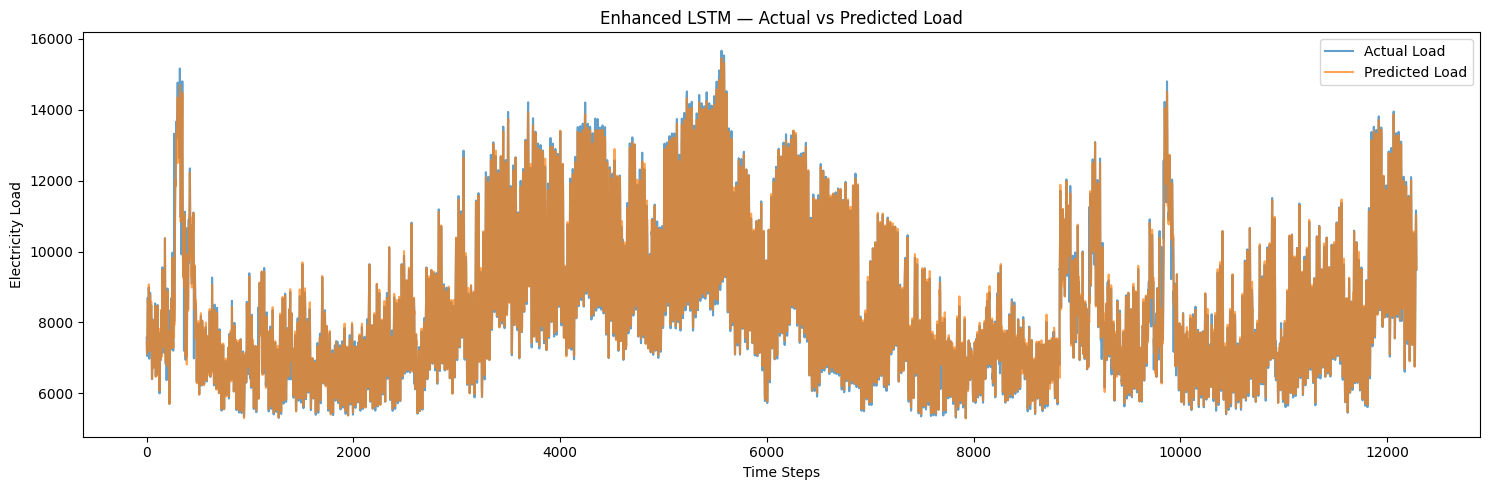

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0077 - val_loss: 8.9845e-04
Epoch 2/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0015 - val_loss: 5.6192e-04
Epoch 3/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0011 - val_loss: 3.9411e-04
Epoch 4/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 7.7782e-04 - val_loss: 3.2704e-04
Epoch 5/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 7.2099e-04 - val_loss: 4.3853e-04
Epoch 6/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 6.6534e-04 - val_loss: 4.6323e-04
Epoch 7/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 6.4172e-04 - val_loss: 4.4495e-04
Epoch 8/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 6.4047e-04 - val_loss: 3.1604e-04
Epoch 9/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 6.2896e-04 - val_loss: 3.6318e-04
Epoch 10/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 5.6826e-04 - val_loss: 3.4271e-04
Epoch 11/60
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/s

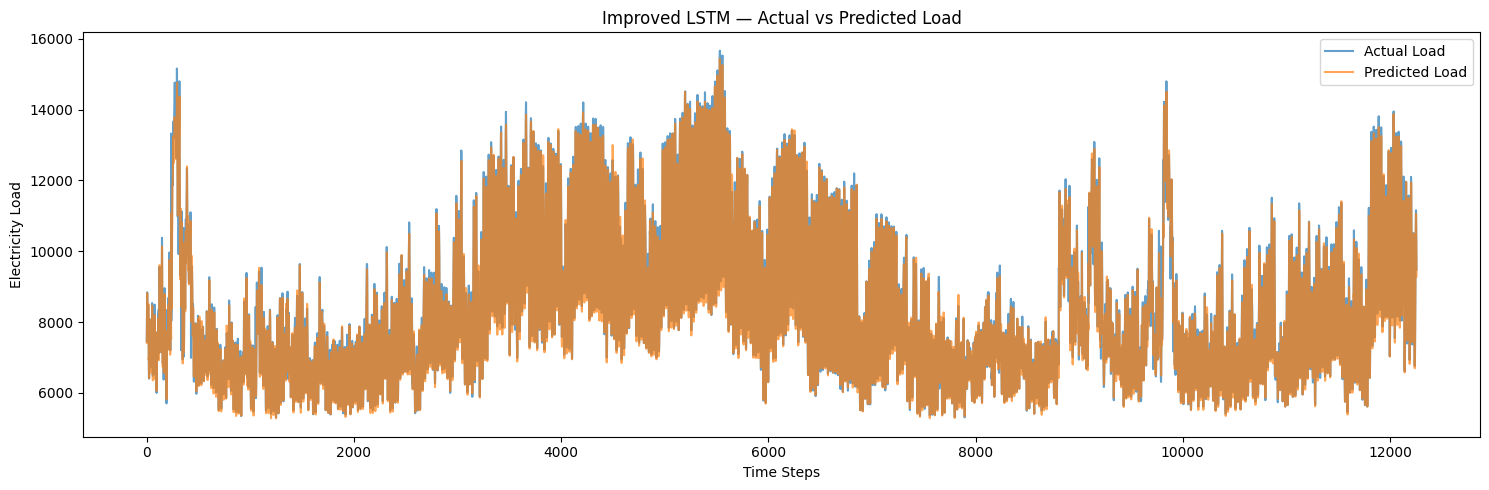

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


merged['CDD'] = (merged['tavg'] - 65).clip(lower=0)
merged['HDD'] = (65 - merged['tavg']).clip(lower=0)
merged['is_holiday'] = merged['is_holiday'].fillna(0).astype(int)
merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

merged['tavg_x_hour'] = merged['tavg'] * merged['hour']
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_168'] = merged['load'].shift(168)
merged['load_lag_24_x_temp'] = merged['load_lag_24'] * merged['tavg']
merged['tavg_roll_mean_24'] = merged['tavg'].rolling(window=24).mean()
merged['is_extreme_heat'] = ((merged['tmax'] > merged['tmax'].quantile(0.95)) & (merged['hour'].between(15, 19))).astype(int)
merged['is_extreme_cold'] = ((merged['tmin'] < merged['tmin'].quantile(0.05)) & (merged['hour'].between(6, 9))).astype(int)
merged.dropna(inplace=True)

feature_cols = [
    'load', 'tavg', 'tmin', 'tmax', 'prcp', 'CDD', 'HDD',
    'hour', 'dayofweek', 'month', 'is_holiday',
    'tavg_x_hour', 'load_lag_24', 'load_lag_168', 'load_lag_24_x_temp',
    'tavg_roll_mean_24', 'is_extreme_heat', 'is_extreme_cold'
]

merged_lstm = merged.dropna(subset=feature_cols).copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged_lstm[feature_cols])
scaled_df = pd.DataFrame(scaled, columns=feature_cols, index=merged_lstm.index)

def create_sequences(data, seq_length=48):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i][0])  # target is 'load'
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(scaled_df.values, seq_length=48)

total_samples = len(X_all)
split_index = int(total_samples * 0.85)
X_train, y_train = X_all[:split_index], y_all[:split_index]
X_test, y_test = X_all[split_index:], y_all[split_index:]

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=60,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

y_pred_scaled = model.predict(X_test)
y_pred = y_pred_scaled.flatten() * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_true = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"📈 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 MAPE: {mape:.2f}%")

# ==== Step 9: Plot Predictions ====
plt.figure(figsize=(15,5))
plt.plot(y_true, label='Actual Load', alpha=0.7)
plt.plot(y_pred, label='Predicted Load', alpha=0.7)
plt.title('Improved LSTM — Actual vs Predicted Load')
plt.xlabel('Time Steps')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0083 - val_loss: 0.0018
Epoch 2/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015 - val_loss: 4.7816e-04
Epoch 3/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 9.8103e-04 - val_loss: 5.5353e-04
Epoch 4/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.7512e-04 - val_loss: 3.1132e-04
Epoch 5/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 6.5832e-04 - val_loss: 3.0183e-04
Epoch 6/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 6.0962e-04 - val_loss: 2.8585e-04
Epoch 7/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.7629e-04 - val_loss: 5.1968e-04
Epoch 8/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.8155e-04 - val_loss: 2.7880e-04
Epoch 9/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.1929e-04 - val_loss: 2.6259e-04
Epoch 10/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.9080e-04 - val_loss: 2.1658e-04
Epoch 11/50
973/973 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.8357e-0

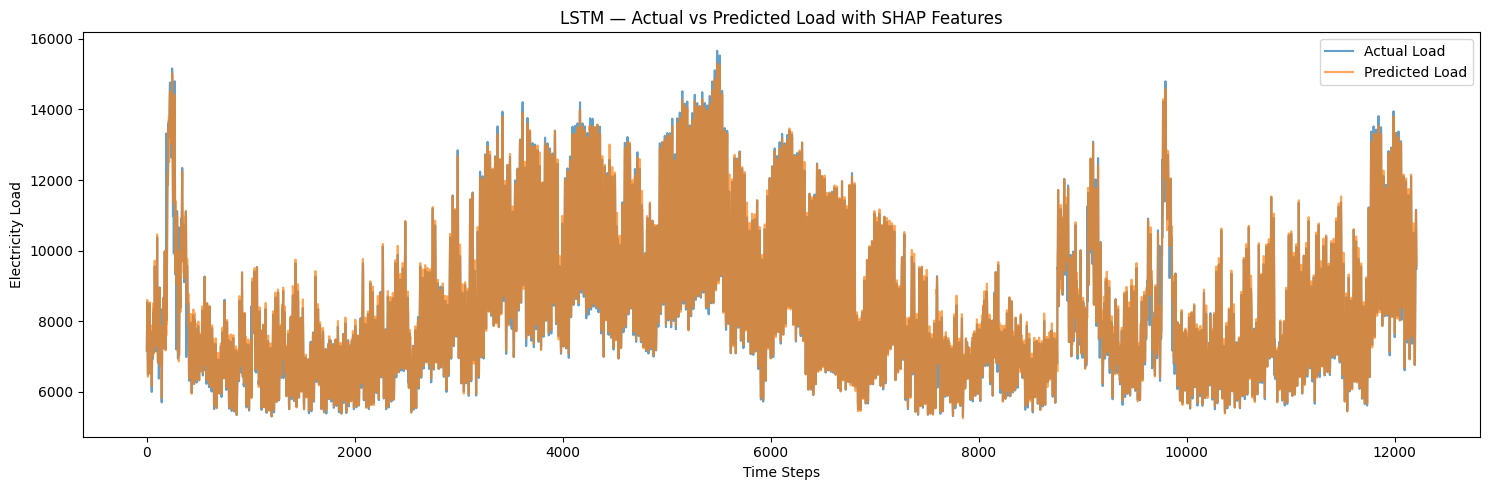

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

merged['hour'] = merged['timestamp'].dt.hour
merged['dayofweek'] = merged['timestamp'].dt.dayofweek
merged['month'] = merged['timestamp'].dt.month

# Lags
merged['load_lag_24'] = merged['load'].shift(24)
merged['load_lag_48'] = merged['load'].shift(48)
merged['load_lag_168'] = merged['load'].shift(168)

# Rolling stats
merged['load_roll_mean_24'] = merged['load'].shift(1).rolling(24).mean()
merged['load_roll_std_24'] = merged['load'].shift(1).rolling(24).std()
merged['load_roll_mean_168'] = merged['load'].shift(1).rolling(168).mean()
merged['load_roll_std_168'] = merged['load'].shift(1).rolling(168).std()
merged['load_roll_mean_336'] = merged['load'].shift(1).rolling(336).mean()
merged['load_roll_max_24'] = merged['load'].shift(1).rolling(24).max()

# Weather lag
merged['tavg_lag_24'] = merged['tavg'].shift(24)
merged['tmin_lag_24'] = merged['tmin'].shift(24)
merged['tmax_lag_24'] = merged['tmax'].shift(24)
merged['prcp_lag_24'] = merged['prcp'].shift(24)

merged['tmax_roll_max_72'] = merged['tmax'].shift(1).rolling(72).max()
merged['tmin_roll_min_72'] = merged['tmin'].shift(1).rolling(72).min()

# Custom features
merged['is_weekend'] = merged['dayofweek'].isin([5,6]).astype(int)
merged['is_monday'] = (merged['dayofweek'] == 0).astype(int)
merged['is_friday'] = (merged['dayofweek'] == 4).astype(int)
merged['CDD_x_hour'] = merged['CDD'] * merged['hour']
merged['lag_24_x_hour'] = merged['load_lag_24'] * merged['hour']
merged['load_spike_vs_mean'] = (merged['load'] - merged['load_roll_mean_24']) / (merged['load_roll_mean_24'] + 1)
merged['temp_spike_vs_mean'] = (merged['tmax'] - merged['tavg']) / (merged['tavg'] + 1)
heat_threshold = merged["tmax"].quantile(0.95)
merged["is_extreme_heat_event"] = (merged["tmax"] > heat_threshold).astype(int)

# Drop NA
merged.dropna(inplace=True)

feature_cols = [
    'load', 'tavg', 'tmax', 'tmin', 'prcp', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_monday', 'is_friday',
    'load_lag_24', 'load_lag_48', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24', 'load_roll_mean_168',
    'load_roll_std_168', 'load_roll_mean_336', 'load_roll_max_24',
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'tmax_roll_max_72', 'tmin_roll_min_72',
    'CDD_x_hour', 'lag_24_x_hour', 'load_spike_vs_mean', 'temp_spike_vs_mean',
    'is_extreme_heat_event'
]

merged_lstm = merged.dropna(subset=feature_cols).copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged_lstm[feature_cols])
scaled_df = pd.DataFrame(scaled, columns=feature_cols, index=merged_lstm.index)

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i][0])  #
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(scaled_df.values, seq_length=24)

split_index = int(len(X_all) * 0.85)
X_train, y_train = X_all[:split_index], y_all[:split_index]
X_test, y_test = X_all[split_index:], y_all[split_index:]

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

y_pred_scaled = model.predict(X_test)
y_pred = y_pred_scaled.flatten() * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_true = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"📈 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 MAPE: {mape:.2f}%")

plt.figure(figsize=(15,5))
plt.plot(y_true, label='Actual Load', alpha=0.7)
plt.plot(y_pred, label='Predicted Load', alpha=0.7)
plt.title('LSTM — Actual vs Predicted Load with SHAP Features')
plt.xlabel('Time Steps')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.0059 - val_loss: 7.2181e-04
Epoch 2/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 7.6248e-04 - val_loss: 4.8246e-04
Epoch 3/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 6.1852e-04 - val_loss: 4.8643e-04
Epoch 4/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 5.3325e-04 - val_loss: 3.2650e-04
Epoch 5/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 4.5296e-04 - val_loss: 2.9385e-04
Epoch 6/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 4.0323e-04 - val_loss: 3.4992e-04
Epoch 7/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 3.9574e-04 - val_loss: 2.9610e-04
Epoch 8/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 3.6244e-04 - val_loss: 2.6833e-04
Epoch 9/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 3.5289e-04 - val_loss: 3.2396e-04
Epoch 10/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 3.4982e-04 - val_loss: 2.5046e-04
Epoch 11/60
973/973 ━━━━━━━━━━━━━━━━━━━━ 13

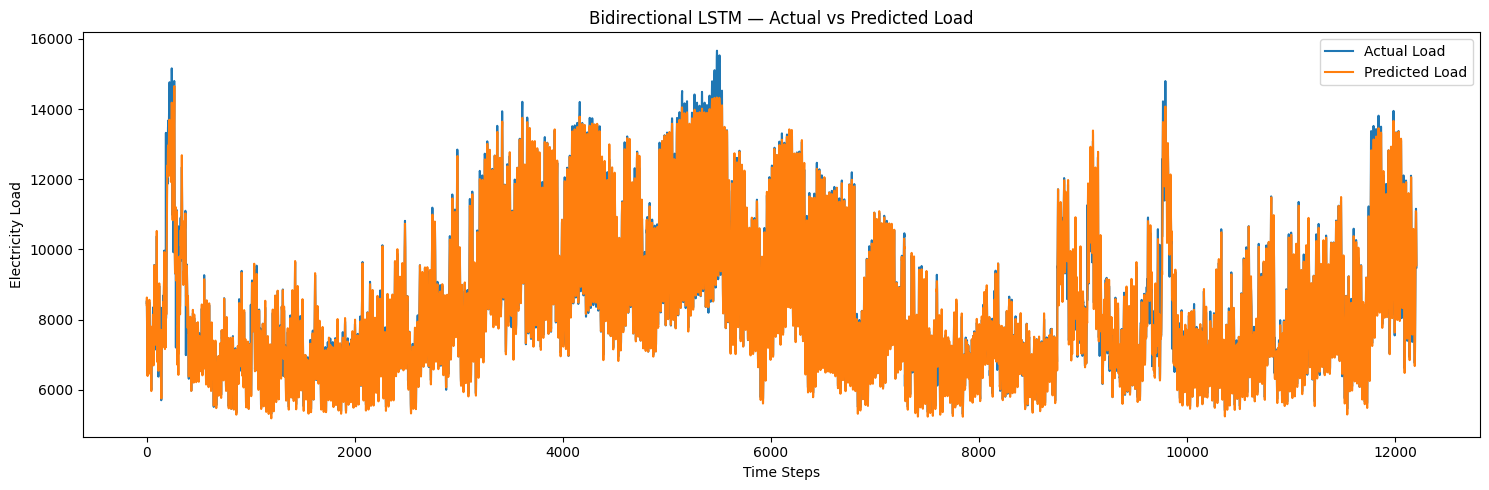

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# === Define features ===
feature_cols = [
    'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'snwd', 'CDD', 'HDD', 'is_holiday',
    'hour', 'dayofweek', 'month', 'is_weekend', 'is_monday', 'is_friday',
    'load_lag_24', 'load_lag_48', 'load_lag_168',
    'load_roll_mean_24', 'load_roll_std_24', 'load_roll_mean_168',
    'load_roll_std_168', 'load_roll_mean_336', 'load_roll_max_24',
    'tavg_lag_24', 'tmin_lag_24', 'tmax_lag_24', 'prcp_lag_24',
    'tmax_roll_max_72', 'tmin_roll_min_72',
    'CDD_x_hour', 'lag_24_x_hour', 'load_spike_vs_mean', 'temp_spike_vs_mean',
    'is_extreme_heat_event'
]

merged_lstm = merged.dropna(subset=feature_cols + ['load']).copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged_lstm[feature_cols + ['load']])
scaled_df = pd.DataFrame(scaled, columns=feature_cols + ['load'], index=merged_lstm.index)

def create_sequences(data, target_col_index, seq_length=48):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i][target_col_index])
    return np.array(X), np.array(y)

target_col_index = len(feature_cols)  # 'load' is last column
X_all, y_all = create_sequences(scaled_df.values, target_col_index, seq_length=48)

split_index = int(len(X_all) * 0.85)
X_train, y_train = X_all[:split_index], y_all[:split_index]
X_test, y_test = X_all[split_index:], y_all[split_index:]

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=60,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

y_pred_scaled = model.predict(X_test)
load_min = scaler.data_min_[-1]
load_max = scaler.data_max_[-1]
y_pred = y_pred_scaled.flatten() * (load_max - load_min) + load_min
y_true = y_test * (load_max - load_min) + load_min

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"📈 MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}%")

plt.figure(figsize=(15,5))
plt.plot(y_true, label='Actual Load')
plt.plot(y_pred, label='Predicted Load')
plt.title('Bidirectional LSTM — Actual vs Predicted Load')
plt.xlabel('Time Steps')
plt.ylabel('Electricity Load')
plt.legend()
plt.tight_layout()
plt.show()


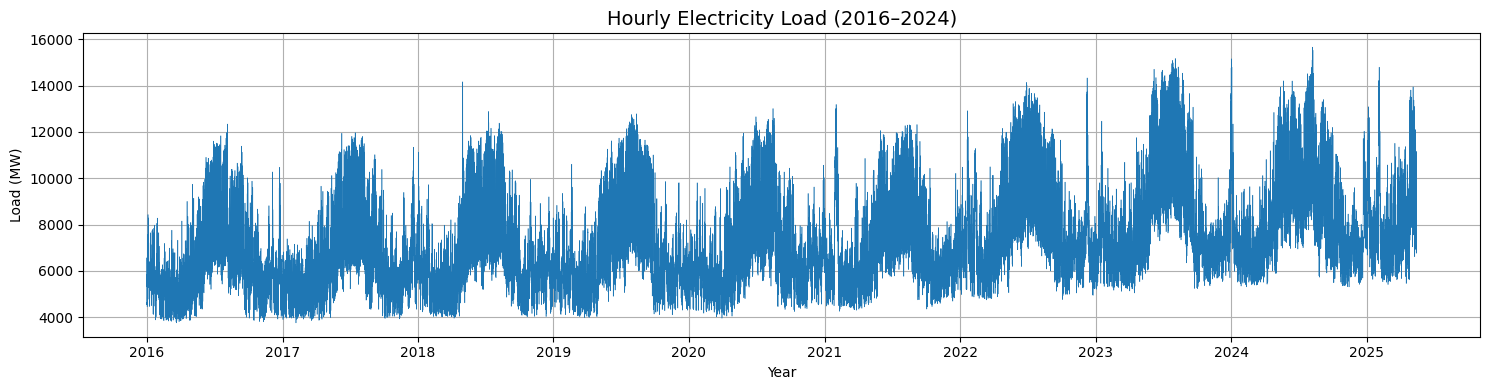

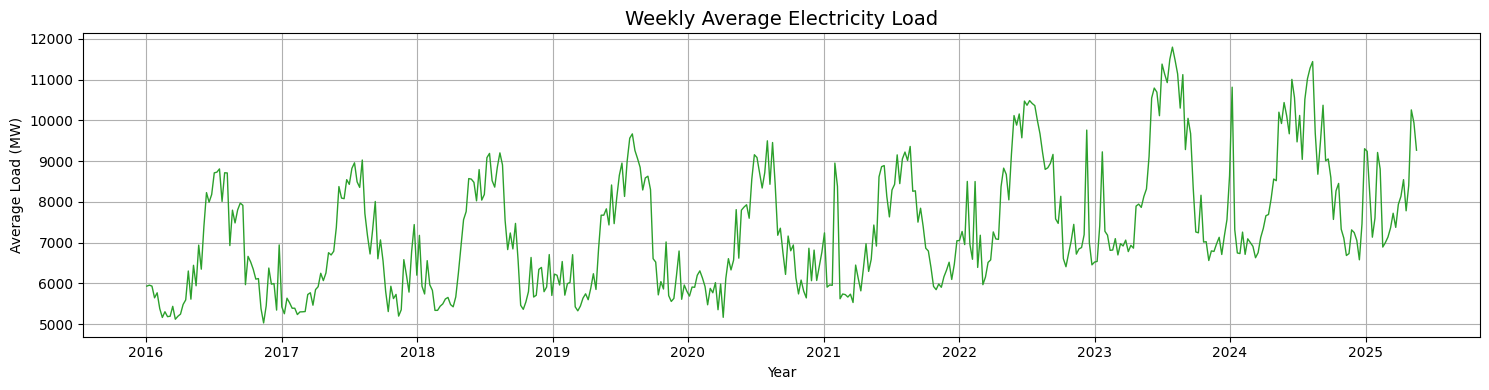

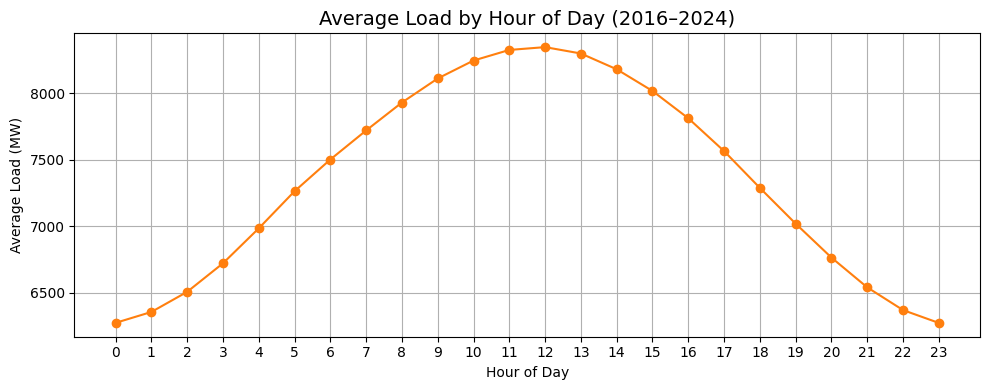